# Physics 404/604

## Computational Physics (Spring 2018)

## BPB-250, Mon./Wed. 2:30-3:45 pm

| Instructor | Prof. Zhaohuan Zhu                 |
| ---------- | :--------------------------------- |
| Email      | zhaohuan.zhu@unlv.edu              |
| Website    | http://www.physics.unlv.edu/~zhzhu |
| Office     | BPB 245                            |

# Wavelet

An extension of Fourier analysis to signals whose forms change in time. Used widely in brain waves,
stock-marcket trends, gravitational waves, and compression of photographic images.

## Nonstationary Signals
\begin{equation}
y(t)=\begin{cases} sin 2\pi t, \quad for \, 0\leq t\leq 2\\
5 sin 2\pi t+10 sin 4\pi t ,\quad for \, 2\leq t\leq 8\\
2.5 sin 2pi t+6 sin 4\pi t+10sin 6 \pi t ,\quad for \, 8\leq t\leq 12\\
\end{cases}
\end{equation}

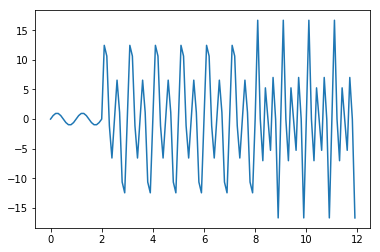

In [83]:
import matplotlib.pyplot as plt
from numpy import *

def func(t):
    if(0<=t and t<=2):
        y=sin(2.*pi*t)
    if(2<=t and t<=8):
        y=5.*sin(2.*pi*t)+10.*sin(4.*pi*t)
    if(8<=t and t<=12):
        y=2.5*sin(2.*pi*t)+6.*sin(4.*pi*t)+10.*sin(6.*pi*t)
    return y
        
t=arange(0,12,0.1)
y=zeros(len(t))
for idx in range(len(t)):
    y[idx]=func(t[idx])

plt.plot(t,y)
plt.show()

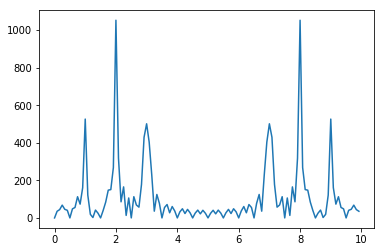

In [84]:
# Fourier analysis

N=len(t)
dftz=zeros(N,complex )
nplot=zeros(N)
fplot=zeros(N)
step = 0.1

def fourier(signal):                                              # DFT
    for n in range(0, N):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, N):                              
          zexpo = complex(0, 2.*pi*k*n/N)           # Complex exponent
          zsum += signal[k]*exp(-zexpo)           
      dftz[n] = zsum * sqrt(2.*pi)      
      nplot[n] = n/N/step
      fplot[n] = sqrt(dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real)
    
fourier(y)

plt.plot(nplot,fplot)
plt.show()

## Wavelet

Fourier transform get all the frequencies simultaneously but it does not
contain time resolution information indicating when each frequency occurs. 
Second, all Fourier components are correlated (overtomes extend over all times
with a constant amplitude. Even 0 is splitted into all Fourier components), 
which means we have stored
more information than necessary. 

The idea behind wavelet analysis is to expand a signal in a complete set of functions (wavelets),
each of which oscillates for a finite period of time, and each of which is centered
at a different time. 

Let's see four sample wavelets:

1) the oscillating Gaussians (Morlet wavelet)
\begin{equation}
\Phi(t)=e^{2\pi i t}e^{-t^2/2\sigma^2}
\end{equation}

![textbook](http://physics.oregonstate.edu/~landaur/Books/CPbook/eBook/Notebooks/HTML/Figs/Fig13_2a.png)

2) the second derivative of a Gaussian (Mexican hat)
\begin{equation}
\Phi(t)=-\sigma^2\frac{d^2}{dt^2} e^{-t^2/2\sigma^2}=(1-\frac{t^2}{\sigma^2})e^{-t^2/2\sigma^2}
\end{equation}


![textbook](http://physics.oregonstate.edu/~landaur/Books/CPbook/eBook/Notebooks/HTML/Figs/Fig13_2b.png)

3) An up-and-down step function

![textbook](http://physics.oregonstate.edu/~landaur/Books/CPbook/eBook/Notebooks/HTML/Figs/Fig13_2c.png)

4) A fractal shape
![textbook](http://physics.oregonstate.edu/~landaur/Books/CPbook/eBook/Notebooks/HTML/Figs/Fig13_2d.png)

Wavelets are localized in both time and frequency. They are large for just a limited time and
contain a limited range of frequency. 

Let's Fourier transform these wavelet to prove unvertainty principle

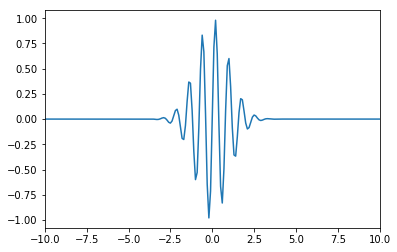

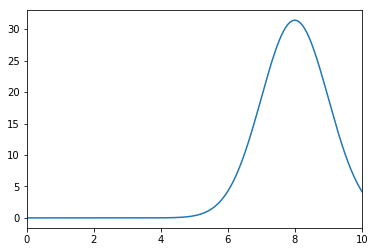

In [91]:
import matplotlib.pyplot as plt
from numpy import *

def func(t):
    return func3(t)

# sin wavelet within a time interval
def func1(t):
    if(abs(t)<6.*pi/5.):
        return sin(5.*t)
    else:
        return 0

# gaussian function
def func2(t):
    y = exp(-t*t/2.)
    return y

# Morlet wavelet
def func3(t):
    y=sin(8.*t)*exp(-t*t/2.)
    return y
    
    
# Mexican hat wavelet
def func4(t):
    # Please finish this one
    return y
    

step=0.1
t=arange(-100.,100.,step)

N=len(t)
y=zeros(N)
dftz=zeros(N,complex )
nplot=zeros(N)
fplot=zeros(N)
for idx in range(len(t)):
    y[idx]=func(t[idx])

    
fig = p.figure() 
plt.plot(t,y)
plt.xlim([-10.,10.])
plt.show()

def fourier(signal):                                              # DFT
    for n in range(0, N):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, N):                              
          zexpo = complex(0, 2.*pi*k*n/N)           # Complex exponent
          zsum += signal[k]*exp(-zexpo)           
      dftz[n] = zsum * sqrt(2.*pi)      
      nplot[n] = n/N/step*2.*pi # the unit of \omega, cos(\omega t)
      fplot[n] = sqrt(dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real)
    
fourier(y)
fig = p.figure() 
plt.plot(nplot,fplot)
plt.xlim([0,10.])
plt.show()

## The Wavelet Transform

The wavelet transform of a time signal y(t) is defined as
\begin{equation}
Y(s,\tau)=\int_{-\infty}^{\infty}dt \psi^*_{s,\tau}(t)y(t)
\end{equation}
with s=2$\pi/\omega$

The standard way to generate a family of wavelet basis starts with 
$\phi(t)$, called a mother function or an analyzing function. Note that
t is real. We can use this function to generate daughter wavelets. 

For example, the mother wavelet
\begin{equation}
\Psi(t)=sin(8*t)e^{-t^2/2}
\end{equation}
We can scale, translate, and normalize this mother wavelet
\begin{equation}
\psi_{s,\tau}(t)\equiv \frac{1}{\sqrt{s}}\Psi(\frac{t-\tau}{s})=\frac{1}{\sqrt{s}}sin\left[\frac{8(t-\tau)}{s}\right]e^{-(t-\tau)^2/2s^2}
\end{equation}
The three daughter wavelets are:
![textbook](http://physics.oregonstate.edu/~landaur/Books/CPbook/eBook/Notebooks/HTML/Figs/Fig13_4a.png)
![textbook](http://physics.oregonstate.edu/~landaur/Books/CPbook/eBook/Notebooks/HTML/Figs/Fig13_4b.png)
![textbook](http://physics.oregonstate.edu/~landaur/Books/CPbook/eBook/Notebooks/HTML/Figs/Fig13_4c.png)

Using daughter wavelets, the wave transform and its inverse transform are
\begin{eqnarray}
Y(s,\tau)=\frac{1}{\sqrt{s}}\int_{-\infty}^{\infty}dt \psi^*(\frac{t-\tau}{s})y(t)\quad (wavelet \, transform)\\
y(t)=\frac{1}{C}\int_{-\infty}^{\infty}d\tau \int_{0}^{\infty}ds \frac{\psi_{s,\tau}(t)}{s^{2}}Y(s,\tau)\quad  (Inverse \, Transform)\\
\end{eqnarray}
where C depends on the wavelet used.  The wavelet transform got a function of
the time scale s (frequency 2$\pi$/s) and window location $\tau$.

The general requirements for a mother wavelet $\Psi$ are
* $\Psi(t)$ is real
* $\Psi(t)$ oscillates around zero such that its average is zero
* $\Psi(t)$ is local.
* The trasforms of low powers of t vanish
\begin{equation}
\int_{-\infty}^{\infty}t^0\Psi(t)dt=\int_{-\infty}^{\infty}t^1\Psi(t)dt=...=\int_{-\infty}^{\infty}t^{p-1}\Psi(t)dt=0
\end{equation}

In [182]:
# Transform  sin(2*pi*t) and the signal given in the beginning (use Morlet wavelet)

import matplotlib.pyplot as plt
from numpy import *
 
ns=100
ntau=300
dstep=3./ns
sar=arange(0.001,3.001,dstep)
dtaustep=20./ntau
tauar=arange(0.,20.,dtaustep)
ystau=zeros((ns, ntau),complex)

nt=600
dtstep=12./nt
tar=arange(0.,12.,dtstep)

def func(t):
    return func2(t)

def func2(t):
    y=0.
    if(0<=t and t<=2):
        y=sin(2.*pi*t)
    if(2<=t and t<=8):
        y=5.*sin(2.*pi*t)+10.*sin(4.*pi*t)
    if(8<=t and t<=12):
        y=2.5*sin(2.*pi*t)+6.*sin(4.*pi*t)+10.*sin(6.*pi*t)
    return y

# sin(2 \pi t)
def func1(t): 
    return(sin(2.*pi*t))

def morlet(t,sigma):
    psi=exp(2.*pi*t*1j)*exp(-t*t/2./sigma/sigma)
    return psi

yarr=zeros(nt)
def wavelet():     
    for idext in range(nt):
        yarr[idext]=func(tar[idext])
    for idexs in range(ns):
        for idextau in range(ntau):
            ystau[idexs,idextau]=1./sqrt(sar[idexs])*sum(conjugate(morlet((tar-tauar[idextau])/sar[idexs],1.))*yarr)*dtstep

wavelet()

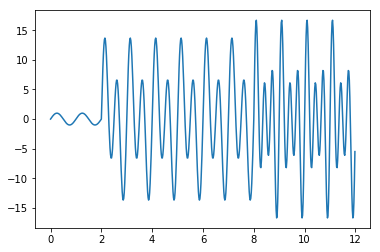

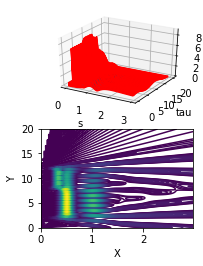

In [174]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pylab  as p   
#ax = fig.add_subplot(1,1,1,projection='3d')

fig = p.figure()                                    # Create figure
#ax = Axes3D(fig) 
p.plot(tar,yarr)
fig = p.figure()  
ax = fig.add_subplot(2,2,1,projection='3d')
X, Y = p.meshgrid(sar, tauar) 
ax.plot_surface(X, Y, abs(transpose(ystau)))                            # Surface
ax.plot_wireframe(X, Y, abs(transpose(ystau)), color = 'r')               # Add wireframe
ax.set_xlabel('s')
ax.set_ylabel('tau')
ax.set_zlabel('Y')
ax = fig.add_subplot(2,2,3)
levels=p.arange(abs(transpose(ystau)).min(),abs(transpose(ystau)).max(),(abs(transpose(ystau)).max() - abs(transpose(ystau)).min())/100.)
CS=p.contour(sar,tauar,transpose(ystau).imag, levels=levels)
p.xlabel('X')
p.ylabel('Y')
p.show()
p.show()  

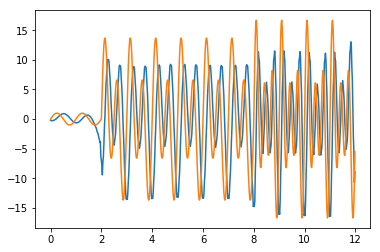

In [175]:
# reconstruct the origional signal

yarr2=zeros(nt,complex)
def invwavelet(yarr2):     
    for idexs in range(ns):
        for idextau in range(ntau):
            yarr2+=1./sqrt(sar[idexs])/sar[idexs]**2.*morlet((tar-tauar[idextau])/sar[idexs],1.)*ystau[idexs,idextau]*dstep*dtaustep

invwavelet(yarr2)
p.plot(tar,yarr2.imag)
p.plot(tar,yarr)
p.show()

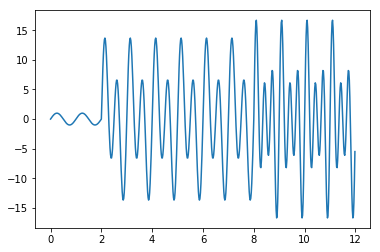

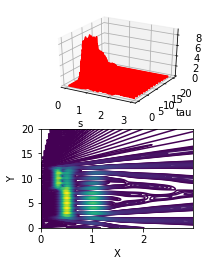

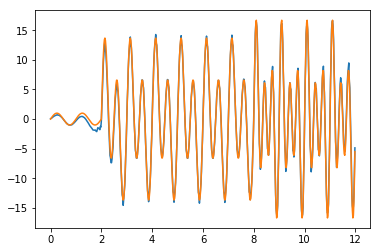

In [181]:
# The same task but only use the imagninary part of the wavelet 

import matplotlib.pyplot as plt
from numpy import *
 
ns=100
ntau=300
dstep=3./ns
sar=arange(0.001,3.001,dstep)
dtaustep=20./ntau
tauar=arange(0.,20.,dtaustep)
ystau=zeros((ns, ntau),complex)

nt=600
dtstep=12./nt
tar=arange(0.,12.,dtstep)

def func(t):
    return func2(t)

def func2(t):
    y=0.
    if(0<=t and t<=2):
        y=sin(2.*pi*t)
    if(2<=t and t<=8):
        y=5.*sin(2.*pi*t)+10.*sin(4.*pi*t)
    if(8<=t and t<=12):
        y=2.5*sin(2.*pi*t)+6.*sin(4.*pi*t)+10.*sin(6.*pi*t)
    return y

def func1(t):
    return(sin(2.*pi*t))

def morlet(t,sigma):
#    psi=exp(2.*pi*t*1j)*exp(-t*t/2./sigma/sigma)
    psi=sin(2.*pi*t)*exp(-t*t/2./sigma/sigma)
    return psi

yarr=zeros(nt)
def wavelet():     
    for idext in range(nt):
        yarr[idext]=func(tar[idext])
    for idexs in range(ns):
        for idextau in range(ntau):
            ystau[idexs,idextau]=1./sqrt(sar[idexs])*sum(conjugate(morlet((tar-tauar[idextau])/sar[idexs],1.))*yarr)*dtstep

wavelet()

from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pylab  as p   
#ax = fig.add_subplot(1,1,1,projection='3d')

fig = p.figure()                                    # Create figure
#ax = Axes3D(fig) 
p.plot(tar,yarr)
fig = p.figure()  
ax = fig.add_subplot(2,2,1,projection='3d')
X, Y = p.meshgrid(sar, tauar) 
ax.plot_surface(X, Y, abs(transpose(ystau)))                            # Surface
ax.plot_wireframe(X, Y, abs(transpose(ystau)), color = 'r')               # Add wireframe
ax.set_xlabel('s')
ax.set_ylabel('tau')
ax.set_zlabel('Y')
ax = fig.add_subplot(2,2,3)
levels=p.arange(abs(transpose(ystau)).min(),abs(transpose(ystau)).max(),(abs(transpose(ystau)).max() - abs(transpose(ystau)).min())/100.)
CS=p.contour(sar,tauar,transpose(ystau).real, levels=levels)
p.xlabel('X')
p.ylabel('Y')
p.show()
p.show()  

yarr2=zeros(nt,complex)
def invwavelet(yarr2):     
    for idexs in range(ns):
        for idextau in range(ntau):
            yarr2+=1./sqrt(sar[idexs])/sar[idexs]**2.*morlet((tar-tauar[idextau])/sar[idexs],1.)*ystau[idexs,idextau]*dstep*dtaustep

invwavelet(yarr2)
p.plot(tar,yarr2.real*2.2)
p.plot(tar,yarr)
p.show()

In [153]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# CWT.py  Continuous Wavelet TF. Based on program by Zlatko Dimcovic 
												
import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D ;
from numpy import *


iT =  0.0;          fT =  12.0;         W = fT - iT;
N =  240;           h =  W/N
noPtsSig =  N;      noS =  20;          noTau =  90;
iTau =  0.;         iS =  0.1;          tau =  iTau;        s =  iS                
            
# Need *very* small s steps for high frequency;
dTau =  W/noTau;    dS =  (W/iS)**(1./noS);
maxY =  0.001;      sig =  zeros((noPtsSig), float)              # Signal
      

    
def signal(noPtsSig, y):                                # Signal function
    tar=array([])
    yyar=array([])
    t = 0.0;     hs = W/noPtsSig;     t1 = W/6.;    t2 = 4.*W/6.
    for i in range(0, noPtsSig):  
        if  t >= iT  and t <=  t1:  y[i] =  sin(2*pi*t)
        elif t >= t1 and t <=  t2: y[i] = 5.*sin(2*pi*t) + 10.*sin(4*pi*t);
        elif t >= t2 and t <=  fT: 
             y[i] = 2.5*sin(2*pi*t) + 6.*sin(4*pi*t) + 10.*sin(6*pi*t)
        else: 
            print("In signal(...) : t out of range.")
            sys.exit(1)
#        y[i] = sin(2*pi*t)
        yy=y[i]
        tar=append(tar,t)
        yyar=append(yyar,yy)
        t += hs  
    p.plot(tar,yyar)
        
signal(noPtsSig, sig)                                       # Form signal
Yn =  zeros( (noS+1, noTau+1), float)                       # Transform

def morlet(t, s, tau):                                      # Mother  
     T =  (t - tau)/s
     return sin(8*T) * exp( - T*T/2. )
	
def transform(s, tau, sig):                            # Find wavelet TF
    integral = 0.
    t = iT;                                                     
    for i in range(0, len(sig) ):
         t += h
         integral += sig[i]*morlet(t, s, tau)*h
    return integral / sqrt(s)
          
def invTransform(t, Yn):                                # Compute inverse
    s = iS                                                    # Transform
    tau = iTau                             
    recSig_t = 0                 
    for i in range (0, noS):
        s *= dS                                              # Scale graph
        tau = iTau     
        for j in range (0, noTau):
            tau += dTau                 
            recSig_t += dTau*dS *(s**(-1.5))* Yn[i,j] * morlet(t,s,tau)
    return recSig_t

print("working, finding transform, count 20")
for i in range( 0, noS):
    s *= dS                                                 # Scaling
    tau = iT
    print(i)
    for j in range(0, noTau):
         tau += dTau                                      # Translate
         Yn[i, j] = transform(s, tau, sig)
         
print("transform found")  
for i in range( 0, noS):
    for j in range( 0, noTau):
        if Yn[i, j] > maxY or Yn[i, j] < - 1 *maxY :
            maxY = abs( Yn[i, j] )                      # Find max Y       
tau =  iT
s =  iS
print("normalize")      
for i in range( 0, noS):
     s *= dS                             
     for j in range( 0, noTau):
         tau +=   dTau                                        # Transform
         Yn[i, j] = Yn[i, j]/maxY
     tau = iT
print("finding inverse transform")                           # Inverse TF
recSigData =  "recSig.dat"                   
recSig =  zeros(len(sig) )                                   
t =  0.0;
print("count to 10")
kco = 0;            j = 0;              Yinv =  Yn         
xxar=array([])
yyar2=array([])
for rs in range(0, len(recSig) ):                     
    recSig[rs] = invTransform(t, Yinv)          # Find input signal
    xx=rs/20
    yy=4.6*recSig[rs]
    xxar=append(xxar,xx)
    yyar2=append(yyar2,yy)
    t += h 
    if kco %24 == 0:
        j += 1
        print(j)                            
    kco += 1    
p.plot(xxar,yyar2)
x = list(range(1, noS + 1))                             
y = list(range(1, noTau + 1))                                         
X,Y = p.meshgrid(x, y)                                    

def functz(Yn):                                # Transform function
    z = Yn[X, Y]    
    return z
                
Z = functz(Yn)                                               
fig = p.figure()                                              
#ax = Axes3D(fig)      
ax = fig.add_subplot(2,2,1,projection='3d')
ax.plot_surface(X, Y, Z)  
ax.plot_wireframe(X, Y, Z, color = 'r')          
ax.set_xlabel('s: scale')                                         
ax.set_ylabel('Tau')
ax.set_zlabel('Transform')
ax = fig.add_subplot(2,2,3)
levels=p.arange(Z.min(),Z.max(),(Z.max() - Z.min())/100.)
CS=p.contour(x,y,Z, levels=levels)
p.xlabel('X')
p.ylabel('Y')
p.show()

print("Done")                                   

working, finding transform, count 20
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
transform found
normalize
finding inverse transform
count to 10
0.12704543433205553 0.0
0.12704543433205553 0.13333333333333333
0.12704543433205553 0.26666666666666666
0.12704543433205553 0.4
0.12704543433205553 0.5333333333333333
0.12704543433205553 0.6666666666666666
0.12704543433205553 0.7999999999999999
0.12704543433205553 0.9333333333333332
0.12704543433205553 1.0666666666666667
0.12704543433205553 1.2
0.12704543433205553 1.3333333333333333
0.12704543433205553 1.4666666666666666
0.12704543433205553 1.5999999999999999
0.12704543433205553 1.7333333333333332
0.12704543433205553 1.8666666666666665
0.12704543433205553 1.9999999999999998
0.12704543433205553 2.1333333333333333
0.12704543433205553 2.2666666666666666
0.12704543433205553 2.4
0.12704543433205553 2.533333333333333
0.12704543433205553 2.6666666666666665
0.12704543433205553 2.8
0.12704543433205553 2.933333333333333
0.12704543433205553 3.06666

1.3917130042341612 0.6666666666666666
1.3917130042341612 0.7999999999999999
1.3917130042341612 0.9333333333333332
1.3917130042341612 1.0666666666666667
1.3917130042341612 1.2
1.3917130042341612 1.3333333333333333
1.3917130042341612 1.4666666666666666
1.3917130042341612 1.5999999999999999
1.3917130042341612 1.7333333333333332
1.3917130042341612 1.8666666666666665
1.3917130042341612 1.9999999999999998
1.3917130042341612 2.1333333333333333
1.3917130042341612 2.2666666666666666
1.3917130042341612 2.4
1.3917130042341612 2.533333333333333
1.3917130042341612 2.6666666666666665
1.3917130042341612 2.8
1.3917130042341612 2.933333333333333
1.3917130042341612 3.0666666666666664
1.3917130042341612 3.1999999999999997
1.3917130042341612 3.333333333333333
1.3917130042341612 3.4666666666666663
1.3917130042341612 3.5999999999999996
1.3917130042341612 3.733333333333333
1.3917130042341612 3.8666666666666663
1.3917130042341612 3.9999999999999996
1.3917130042341612 4.133333333333333
1.3917130042341612 4.266

9.44543978545178 7.733333333333344
9.44543978545178 7.866666666666678
9.44543978545178 8.00000000000001
9.44543978545178 8.133333333333344
9.44543978545178 8.266666666666676
9.44543978545178 8.40000000000001
9.44543978545178 8.533333333333342
9.44543978545178 8.666666666666675
9.44543978545178 8.800000000000008
9.44543978545178 8.93333333333334
9.44543978545178 9.066666666666674
9.44543978545178 9.200000000000006
9.44543978545178 9.33333333333334
9.44543978545178 9.466666666666672
9.44543978545178 9.600000000000005
9.44543978545178 9.733333333333338
9.44543978545178 9.86666666666667
9.44543978545178 10.000000000000004
9.44543978545178 10.133333333333336
9.44543978545178 10.26666666666667
9.44543978545178 10.400000000000002
9.44543978545178 10.533333333333335
9.44543978545178 10.666666666666668
9.44543978545178 10.8
9.44543978545178 10.933333333333334
9.44543978545178 11.066666666666666
9.44543978545178 11.2
9.44543978545178 11.333333333333332
9.44543978545178 11.466666666666665
9.44543

0.6786916380543174 5.46666666666667
0.6786916380543174 5.600000000000004
0.6786916380543174 5.733333333333338
0.6786916380543174 5.866666666666672
0.6786916380543174 6.000000000000005
0.6786916380543174 6.133333333333339
0.6786916380543174 6.266666666666673
0.6786916380543174 6.400000000000007
0.6786916380543174 6.53333333333334
0.6786916380543174 6.666666666666674
0.6786916380543174 6.800000000000008
0.6786916380543174 6.933333333333342
0.6786916380543174 7.066666666666675
0.6786916380543174 7.200000000000009
0.6786916380543174 7.333333333333343
0.6786916380543174 7.4666666666666766
0.6786916380543174 7.60000000000001
0.6786916380543174 7.733333333333344
0.6786916380543174 7.866666666666678
0.6786916380543174 8.00000000000001
0.6786916380543174 8.133333333333344
0.6786916380543174 8.266666666666676
0.6786916380543174 8.40000000000001
0.6786916380543174 8.533333333333342
0.6786916380543174 8.666666666666675
0.6786916380543174 8.800000000000008
0.6786916380543174 8.93333333333334
0.6786

4.606223395648526 8.00000000000001
4.606223395648526 8.133333333333344
4.606223395648526 8.266666666666676
4.606223395648526 8.40000000000001
4.606223395648526 8.533333333333342
4.606223395648526 8.666666666666675
4.606223395648526 8.800000000000008
4.606223395648526 8.93333333333334
4.606223395648526 9.066666666666674
4.606223395648526 9.200000000000006
4.606223395648526 9.33333333333334
4.606223395648526 9.466666666666672
4.606223395648526 9.600000000000005
4.606223395648526 9.733333333333338
4.606223395648526 9.86666666666667
4.606223395648526 10.000000000000004
4.606223395648526 10.133333333333336
4.606223395648526 10.26666666666667
4.606223395648526 10.400000000000002
4.606223395648526 10.533333333333335
4.606223395648526 10.666666666666668
4.606223395648526 10.8
4.606223395648526 10.933333333333334
4.606223395648526 11.066666666666666
4.606223395648526 11.2
4.606223395648526 11.333333333333332
4.606223395648526 11.466666666666665
4.606223395648526 11.599999999999998
4.60622339564

0.3309750919646872 1.0666666666666667
0.3309750919646872 1.2
0.3309750919646872 1.3333333333333333
0.3309750919646872 1.4666666666666666
0.3309750919646872 1.5999999999999999
0.3309750919646872 1.7333333333333332
0.3309750919646872 1.8666666666666665
0.3309750919646872 1.9999999999999998
0.3309750919646872 2.1333333333333333
0.3309750919646872 2.2666666666666666
0.3309750919646872 2.4
0.3309750919646872 2.533333333333333
0.3309750919646872 2.6666666666666665
0.3309750919646872 2.8
0.3309750919646872 2.933333333333333
0.3309750919646872 3.0666666666666664
0.3309750919646872 3.1999999999999997
0.3309750919646872 3.333333333333333
0.3309750919646872 3.4666666666666663
0.3309750919646872 3.5999999999999996
0.3309750919646872 3.733333333333333
0.3309750919646872 3.8666666666666663
0.3309750919646872 3.9999999999999996
0.3309750919646872 4.133333333333333
0.3309750919646872 4.266666666666667
0.3309750919646872 4.4
0.3309750919646872 4.533333333333334
0.3309750919646872 4.666666666666668
0.33

2.2463002732069195 4.266666666666667
2.2463002732069195 4.4
2.2463002732069195 4.533333333333334
2.2463002732069195 4.666666666666668
2.2463002732069195 4.800000000000002
2.2463002732069195 4.933333333333335
2.2463002732069195 5.066666666666669
2.2463002732069195 5.200000000000003
2.2463002732069195 5.333333333333337
2.2463002732069195 5.46666666666667
2.2463002732069195 5.600000000000004
2.2463002732069195 5.733333333333338
2.2463002732069195 5.866666666666672
2.2463002732069195 6.000000000000005
2.2463002732069195 6.133333333333339
2.2463002732069195 6.266666666666673
2.2463002732069195 6.400000000000007
2.2463002732069195 6.53333333333334
2.2463002732069195 6.666666666666674
2.2463002732069195 6.800000000000008
2.2463002732069195 6.933333333333342
2.2463002732069195 7.066666666666675
2.2463002732069195 7.200000000000009
2.2463002732069195 7.333333333333343
2.2463002732069195 7.4666666666666766
2.2463002732069195 7.60000000000001
2.2463002732069195 7.733333333333344
2.246300273206919

0.12704543433205553 8.266666666666676
0.12704543433205553 8.40000000000001
0.12704543433205553 8.533333333333342
0.12704543433205553 8.666666666666675
0.12704543433205553 8.800000000000008
0.12704543433205553 8.93333333333334
0.12704543433205553 9.066666666666674
0.12704543433205553 9.200000000000006
0.12704543433205553 9.33333333333334
0.12704543433205553 9.466666666666672
0.12704543433205553 9.600000000000005
0.12704543433205553 9.733333333333338
0.12704543433205553 9.86666666666667
0.12704543433205553 10.000000000000004
0.12704543433205553 10.133333333333336
0.12704543433205553 10.26666666666667
0.12704543433205553 10.400000000000002
0.12704543433205553 10.533333333333335
0.12704543433205553 10.666666666666668
0.12704543433205553 10.8
0.12704543433205553 10.933333333333334
0.12704543433205553 11.066666666666666
0.12704543433205553 11.2
0.12704543433205553 11.333333333333332
0.12704543433205553 11.466666666666665
0.12704543433205553 11.599999999999998
0.12704543433205553 11.733333333

0.8622467393414498 4.933333333333335
0.8622467393414498 5.066666666666669
0.8622467393414498 5.200000000000003
0.8622467393414498 5.333333333333337
0.8622467393414498 5.46666666666667
0.8622467393414498 5.600000000000004
0.8622467393414498 5.733333333333338
0.8622467393414498 5.866666666666672
0.8622467393414498 6.000000000000005
0.8622467393414498 6.133333333333339
0.8622467393414498 6.266666666666673
0.8622467393414498 6.400000000000007
0.8622467393414498 6.53333333333334
0.8622467393414498 6.666666666666674
0.8622467393414498 6.800000000000008
0.8622467393414498 6.933333333333342
0.8622467393414498 7.066666666666675
0.8622467393414498 7.200000000000009
0.8622467393414498 7.333333333333343
0.8622467393414498 7.4666666666666766
0.8622467393414498 7.60000000000001
0.8622467393414498 7.733333333333344
0.8622467393414498 7.866666666666678
0.8622467393414498 8.00000000000001
0.8622467393414498 8.133333333333344
0.8622467393414498 8.266666666666676
0.8622467393414498 8.40000000000001
0.862

7.434694395049622 2.933333333333333
7.434694395049622 3.0666666666666664
7.434694395049622 3.1999999999999997
7.434694395049622 3.333333333333333
7.434694395049622 3.4666666666666663
7.434694395049622 3.5999999999999996
7.434694395049622 3.733333333333333
7.434694395049622 3.8666666666666663
7.434694395049622 3.9999999999999996
7.434694395049622 4.133333333333333
7.434694395049622 4.266666666666667
7.434694395049622 4.4
7.434694395049622 4.533333333333334
7.434694395049622 4.666666666666668
7.434694395049622 4.800000000000002
7.434694395049622 4.933333333333335
7.434694395049622 5.066666666666669
7.434694395049622 5.200000000000003
7.434694395049622 5.333333333333337
7.434694395049622 5.46666666666667
7.434694395049622 5.600000000000004
7.434694395049622 5.733333333333338
7.434694395049622 5.866666666666672
7.434694395049622 6.000000000000005
7.434694395049622 6.133333333333339
7.434694395049622 6.266666666666673
7.434694395049622 6.400000000000007
7.434694395049622 6.53333333333334
7.

0.4204887431174571 9.733333333333338
0.4204887431174571 9.86666666666667
0.4204887431174571 10.000000000000004
0.4204887431174571 10.133333333333336
0.4204887431174571 10.26666666666667
0.4204887431174571 10.400000000000002
0.4204887431174571 10.533333333333335
0.4204887431174571 10.666666666666668
0.4204887431174571 10.8
0.4204887431174571 10.933333333333334
0.4204887431174571 11.066666666666666
0.4204887431174571 11.2
0.4204887431174571 11.333333333333332
0.4204887431174571 11.466666666666665
0.4204887431174571 11.599999999999998
0.4204887431174571 11.73333333333333
0.4204887431174571 11.866666666666664
0.5342117500109747 0.0
0.5342117500109747 0.13333333333333333
0.5342117500109747 0.26666666666666666
0.5342117500109747 0.4
0.5342117500109747 0.5333333333333333
0.5342117500109747 0.6666666666666666
0.5342117500109747 0.7999999999999999
0.5342117500109747 0.9333333333333332
0.5342117500109747 1.0666666666666667
0.5342117500109747 1.2
0.5342117500109747 1.3333333333333333
0.5342117500

3.625650476828119 1.3333333333333333
3.625650476828119 1.4666666666666666
3.625650476828119 1.5999999999999999
3.625650476828119 1.7333333333333332
3.625650476828119 1.8666666666666665
3.625650476828119 1.9999999999999998
3.625650476828119 2.1333333333333333
3.625650476828119 2.2666666666666666
3.625650476828119 2.4
3.625650476828119 2.533333333333333
3.625650476828119 2.6666666666666665
3.625650476828119 2.8
3.625650476828119 2.933333333333333
3.625650476828119 3.0666666666666664
3.625650476828119 3.1999999999999997
3.625650476828119 3.333333333333333
3.625650476828119 3.4666666666666663
3.625650476828119 3.5999999999999996
3.625650476828119 3.733333333333333
3.625650476828119 3.8666666666666663
3.625650476828119 3.9999999999999996
3.625650476828119 4.133333333333333
3.625650476828119 4.266666666666667
3.625650476828119 4.4
3.625650476828119 4.533333333333334
3.625650476828119 4.666666666666668
3.625650476828119 4.800000000000002
3.625650476828119 4.933333333333335
3.625650476828119 5

0.205058221760908 2.533333333333333
0.205058221760908 2.6666666666666665
0.205058221760908 2.8
0.205058221760908 2.933333333333333
0.205058221760908 3.0666666666666664
0.205058221760908 3.1999999999999997
0.205058221760908 3.333333333333333
0.205058221760908 3.4666666666666663
0.205058221760908 3.5999999999999996
0.205058221760908 3.733333333333333
0.205058221760908 3.8666666666666663
0.205058221760908 3.9999999999999996
0.205058221760908 4.133333333333333
0.205058221760908 4.266666666666667
0.205058221760908 4.4
0.205058221760908 4.533333333333334
0.205058221760908 4.666666666666668
0.205058221760908 4.800000000000002
0.205058221760908 4.933333333333335
0.205058221760908 5.066666666666669
0.205058221760908 5.200000000000003
0.205058221760908 5.333333333333337
0.205058221760908 5.46666666666667
0.205058221760908 5.600000000000004
0.205058221760908 5.733333333333338
0.205058221760908 5.866666666666672
0.205058221760908 6.000000000000005
0.205058221760908 6.133333333333339
0.205058221760

1.3917130042341612 6.666666666666674
1.3917130042341612 6.800000000000008
1.3917130042341612 6.933333333333342
1.3917130042341612 7.066666666666675
1.3917130042341612 7.200000000000009
1.3917130042341612 7.333333333333343
1.3917130042341612 7.4666666666666766
1.3917130042341612 7.60000000000001
1.3917130042341612 7.733333333333344
1.3917130042341612 7.866666666666678
1.3917130042341612 8.00000000000001
1.3917130042341612 8.133333333333344
1.3917130042341612 8.266666666666676
1.3917130042341612 8.40000000000001
1.3917130042341612 8.533333333333342
1.3917130042341612 8.666666666666675
1.3917130042341612 8.800000000000008
1.3917130042341612 8.93333333333334
1.3917130042341612 9.066666666666674
1.3917130042341612 9.200000000000006
1.3917130042341612 9.33333333333334
1.3917130042341612 9.466666666666672
1.3917130042341612 9.600000000000005
1.3917130042341612 9.733333333333338
1.3917130042341612 9.86666666666667
1.3917130042341612 10.000000000000004
1.3917130042341612 10.133333333333336
1.39

11.999999999999988 0.9333333333333332
11.999999999999988 1.0666666666666667
11.999999999999988 1.2
11.999999999999988 1.3333333333333333
11.999999999999988 1.4666666666666666
11.999999999999988 1.5999999999999999
11.999999999999988 1.7333333333333332
11.999999999999988 1.8666666666666665
11.999999999999988 1.9999999999999998
11.999999999999988 2.1333333333333333
11.999999999999988 2.2666666666666666
11.999999999999988 2.4
11.999999999999988 2.533333333333333
11.999999999999988 2.6666666666666665
11.999999999999988 2.8
11.999999999999988 2.933333333333333
11.999999999999988 3.0666666666666664
11.999999999999988 3.1999999999999997
11.999999999999988 3.333333333333333
11.999999999999988 3.4666666666666663
11.999999999999988 3.5999999999999996
11.999999999999988 3.733333333333333
11.999999999999988 3.8666666666666663
11.999999999999988 3.9999999999999996
11.999999999999988 4.133333333333333
11.999999999999988 4.266666666666667
11.999999999999988 4.4
11.999999999999988 4.533333333333334
11.

0.6786916380543174 4.533333333333334
0.6786916380543174 4.666666666666668
0.6786916380543174 4.800000000000002
0.6786916380543174 4.933333333333335
0.6786916380543174 5.066666666666669
0.6786916380543174 5.200000000000003
0.6786916380543174 5.333333333333337
0.6786916380543174 5.46666666666667
0.6786916380543174 5.600000000000004
0.6786916380543174 5.733333333333338
0.6786916380543174 5.866666666666672
0.6786916380543174 6.000000000000005
0.6786916380543174 6.133333333333339
0.6786916380543174 6.266666666666673
0.6786916380543174 6.400000000000007
0.6786916380543174 6.53333333333334
0.6786916380543174 6.666666666666674
0.6786916380543174 6.800000000000008
0.6786916380543174 6.933333333333342
0.6786916380543174 7.066666666666675
0.6786916380543174 7.200000000000009
0.6786916380543174 7.333333333333343
0.6786916380543174 7.4666666666666766
0.6786916380543174 7.60000000000001
0.6786916380543174 7.733333333333344
0.6786916380543174 7.866666666666678
0.6786916380543174 8.00000000000001
0.67

4.606223395648526 9.33333333333334
4.606223395648526 9.466666666666672
4.606223395648526 9.600000000000005
4.606223395648526 9.733333333333338
4.606223395648526 9.86666666666667
4.606223395648526 10.000000000000004
4.606223395648526 10.133333333333336
4.606223395648526 10.26666666666667
4.606223395648526 10.400000000000002
4.606223395648526 10.533333333333335
4.606223395648526 10.666666666666668
4.606223395648526 10.8
4.606223395648526 10.933333333333334
4.606223395648526 11.066666666666666
4.606223395648526 11.2
4.606223395648526 11.333333333333332
4.606223395648526 11.466666666666665
4.606223395648526 11.599999999999998
4.606223395648526 11.73333333333333
4.606223395648526 11.866666666666664
5.851996519306427 0.0
5.851996519306427 0.13333333333333333
5.851996519306427 0.26666666666666666
5.851996519306427 0.4
5.851996519306427 0.5333333333333333
5.851996519306427 0.6666666666666666
5.851996519306427 0.7999999999999999
5.851996519306427 0.9333333333333332
5.851996519306427 1.066666666

0.26051710846973514 11.73333333333333
0.26051710846973514 11.866666666666664
0.3309750919646872 0.0
0.3309750919646872 0.13333333333333333
0.3309750919646872 0.26666666666666666
0.3309750919646872 0.4
0.3309750919646872 0.5333333333333333
0.3309750919646872 0.6666666666666666
0.3309750919646872 0.7999999999999999
0.3309750919646872 0.9333333333333332
0.3309750919646872 1.0666666666666667
0.3309750919646872 1.2
0.3309750919646872 1.3333333333333333
0.3309750919646872 1.4666666666666666
0.3309750919646872 1.5999999999999999
0.3309750919646872 1.7333333333333332
0.3309750919646872 1.8666666666666665
0.3309750919646872 1.9999999999999998
0.3309750919646872 2.1333333333333333
0.3309750919646872 2.2666666666666666
0.3309750919646872 2.4
0.3309750919646872 2.533333333333333
0.3309750919646872 2.6666666666666665
0.3309750919646872 2.8
0.3309750919646872 2.933333333333333
0.3309750919646872 3.0666666666666664
0.3309750919646872 3.1999999999999997
0.3309750919646872 3.333333333333333
0.330975091

2.2463002732069195 3.5999999999999996
2.2463002732069195 3.733333333333333
2.2463002732069195 3.8666666666666663
2.2463002732069195 3.9999999999999996
2.2463002732069195 4.133333333333333
2.2463002732069195 4.266666666666667
2.2463002732069195 4.4
2.2463002732069195 4.533333333333334
2.2463002732069195 4.666666666666668
2.2463002732069195 4.800000000000002
2.2463002732069195 4.933333333333335
2.2463002732069195 5.066666666666669
2.2463002732069195 5.200000000000003
2.2463002732069195 5.333333333333337
2.2463002732069195 5.46666666666667
2.2463002732069195 5.600000000000004
2.2463002732069195 5.733333333333338
2.2463002732069195 5.866666666666672
2.2463002732069195 6.000000000000005
2.2463002732069195 6.133333333333339
2.2463002732069195 6.266666666666673
2.2463002732069195 6.400000000000007
2.2463002732069195 6.53333333333334
2.2463002732069195 6.666666666666674
2.2463002732069195 6.800000000000008
2.2463002732069195 6.933333333333342
2.2463002732069195 7.066666666666675
2.246300273206

0.12704543433205553 8.133333333333344
0.12704543433205553 8.266666666666676
0.12704543433205553 8.40000000000001
0.12704543433205553 8.533333333333342
0.12704543433205553 8.666666666666675
0.12704543433205553 8.800000000000008
0.12704543433205553 8.93333333333334
0.12704543433205553 9.066666666666674
0.12704543433205553 9.200000000000006
0.12704543433205553 9.33333333333334
0.12704543433205553 9.466666666666672
0.12704543433205553 9.600000000000005
0.12704543433205553 9.733333333333338
0.12704543433205553 9.86666666666667
0.12704543433205553 10.000000000000004
0.12704543433205553 10.133333333333336
0.12704543433205553 10.26666666666667
0.12704543433205553 10.400000000000002
0.12704543433205553 10.533333333333335
0.12704543433205553 10.666666666666668
0.12704543433205553 10.8
0.12704543433205553 10.933333333333334
0.12704543433205553 11.066666666666666
0.12704543433205553 11.2
0.12704543433205553 11.333333333333332
0.12704543433205553 11.466666666666665
0.12704543433205553 11.5999999999

0.8622467393414498 7.733333333333344
0.8622467393414498 7.866666666666678
0.8622467393414498 8.00000000000001
0.8622467393414498 8.133333333333344
0.8622467393414498 8.266666666666676
0.8622467393414498 8.40000000000001
0.8622467393414498 8.533333333333342
0.8622467393414498 8.666666666666675
0.8622467393414498 8.800000000000008
0.8622467393414498 8.93333333333334
0.8622467393414498 9.066666666666674
0.8622467393414498 9.200000000000006
0.8622467393414498 9.33333333333334
0.8622467393414498 9.466666666666672
0.8622467393414498 9.600000000000005
0.8622467393414498 9.733333333333338
0.8622467393414498 9.86666666666667
0.8622467393414498 10.000000000000004
0.8622467393414498 10.133333333333336
0.8622467393414498 10.26666666666667
0.8622467393414498 10.400000000000002
0.8622467393414498 10.533333333333335
0.8622467393414498 10.666666666666668
0.8622467393414498 10.8
0.8622467393414498 10.933333333333334
0.8622467393414498 11.066666666666666
0.8622467393414498 11.2
0.8622467393414498 11.333

5.851996519306427 11.866666666666664
7.434694395049622 0.0
7.434694395049622 0.13333333333333333
7.434694395049622 0.26666666666666666
7.434694395049622 0.4
7.434694395049622 0.5333333333333333
7.434694395049622 0.6666666666666666
7.434694395049622 0.7999999999999999
7.434694395049622 0.9333333333333332
7.434694395049622 1.0666666666666667
7.434694395049622 1.2
7.434694395049622 1.3333333333333333
7.434694395049622 1.4666666666666666
7.434694395049622 1.5999999999999999
7.434694395049622 1.7333333333333332
7.434694395049622 1.8666666666666665
7.434694395049622 1.9999999999999998
7.434694395049622 2.1333333333333333
7.434694395049622 2.2666666666666666
7.434694395049622 2.4
7.434694395049622 2.533333333333333
7.434694395049622 2.6666666666666665
7.434694395049622 2.8
7.434694395049622 2.933333333333333
7.434694395049622 3.0666666666666664
7.434694395049622 3.1999999999999997
7.434694395049622 3.333333333333333
7.434694395049622 3.4666666666666663
7.434694395049622 3.5999999999999996
7.4

0.4204887431174571 2.533333333333333
0.4204887431174571 2.6666666666666665
0.4204887431174571 2.8
0.4204887431174571 2.933333333333333
0.4204887431174571 3.0666666666666664
0.4204887431174571 3.1999999999999997
0.4204887431174571 3.333333333333333
0.4204887431174571 3.4666666666666663
0.4204887431174571 3.5999999999999996
0.4204887431174571 3.733333333333333
0.4204887431174571 3.8666666666666663
0.4204887431174571 3.9999999999999996
0.4204887431174571 4.133333333333333
0.4204887431174571 4.266666666666667
0.4204887431174571 4.4
0.4204887431174571 4.533333333333334
0.4204887431174571 4.666666666666668
0.4204887431174571 4.800000000000002
0.4204887431174571 4.933333333333335
0.4204887431174571 5.066666666666669
0.4204887431174571 5.200000000000003
0.4204887431174571 5.333333333333337
0.4204887431174571 5.46666666666667
0.4204887431174571 5.600000000000004
0.4204887431174571 5.733333333333338
0.4204887431174571 5.866666666666672
0.4204887431174571 6.000000000000005
0.4204887431174571 6.13

2.8538219384978807 3.9999999999999996
2.8538219384978807 4.133333333333333
2.8538219384978807 4.266666666666667
2.8538219384978807 4.4
2.8538219384978807 4.533333333333334
2.8538219384978807 4.666666666666668
2.8538219384978807 4.800000000000002
2.8538219384978807 4.933333333333335
2.8538219384978807 5.066666666666669
2.8538219384978807 5.200000000000003
2.8538219384978807 5.333333333333337
2.8538219384978807 5.46666666666667
2.8538219384978807 5.600000000000004
2.8538219384978807 5.733333333333338
2.8538219384978807 5.866666666666672
2.8538219384978807 6.000000000000005
2.8538219384978807 6.133333333333339
2.8538219384978807 6.266666666666673
2.8538219384978807 6.400000000000007
2.8538219384978807 6.53333333333334
2.8538219384978807 6.666666666666674
2.8538219384978807 6.800000000000008
2.8538219384978807 6.933333333333342
2.8538219384978807 7.066666666666675
2.8538219384978807 7.200000000000009
2.8538219384978807 7.333333333333343
2.8538219384978807 7.4666666666666766
2.8538219384978

0.12704543433205553 11.866666666666664
0.16140542384620635 0.0
0.16140542384620635 0.13333333333333333
0.16140542384620635 0.26666666666666666
0.16140542384620635 0.4
0.16140542384620635 0.5333333333333333
0.16140542384620635 0.6666666666666666
0.16140542384620635 0.7999999999999999
0.16140542384620635 0.9333333333333332
0.16140542384620635 1.0666666666666667
0.16140542384620635 1.2
0.16140542384620635 1.3333333333333333
0.16140542384620635 1.4666666666666666
0.16140542384620635 1.5999999999999999
0.16140542384620635 1.7333333333333332
0.16140542384620635 1.8666666666666665
0.16140542384620635 1.9999999999999998
0.16140542384620635 2.1333333333333333
0.16140542384620635 2.2666666666666666
0.16140542384620635 2.4
0.16140542384620635 2.533333333333333
0.16140542384620635 2.6666666666666665
0.16140542384620635 2.8
0.16140542384620635 2.933333333333333
0.16140542384620635 3.0666666666666664
0.16140542384620635 3.1999999999999997
0.16140542384620635 3.333333333333333
0.16140542384620635 3.4

0.6786916380543174 9.066666666666674
0.6786916380543174 9.200000000000006
0.6786916380543174 9.33333333333334
0.6786916380543174 9.466666666666672
0.6786916380543174 9.600000000000005
0.6786916380543174 9.733333333333338
0.6786916380543174 9.86666666666667
0.6786916380543174 10.000000000000004
0.6786916380543174 10.133333333333336
0.6786916380543174 10.26666666666667
0.6786916380543174 10.400000000000002
0.6786916380543174 10.533333333333335
0.6786916380543174 10.666666666666668
0.6786916380543174 10.8
0.6786916380543174 10.933333333333334
0.6786916380543174 11.066666666666666
0.6786916380543174 11.2
0.6786916380543174 11.333333333333332
0.6786916380543174 11.466666666666665
0.6786916380543174 11.599999999999998
0.6786916380543174 11.73333333333333
0.6786916380543174 11.866666666666664
0.8622467393414498 0.0
0.8622467393414498 0.13333333333333333
0.8622467393414498 0.26666666666666666
0.8622467393414498 0.4
0.8622467393414498 0.5333333333333333
0.8622467393414498 0.6666666666666666
0.8

4.606223395648526 6.53333333333334
4.606223395648526 6.666666666666674
4.606223395648526 6.800000000000008
4.606223395648526 6.933333333333342
4.606223395648526 7.066666666666675
4.606223395648526 7.200000000000009
4.606223395648526 7.333333333333343
4.606223395648526 7.4666666666666766
4.606223395648526 7.60000000000001
4.606223395648526 7.733333333333344
4.606223395648526 7.866666666666678
4.606223395648526 8.00000000000001
4.606223395648526 8.133333333333344
4.606223395648526 8.266666666666676
4.606223395648526 8.40000000000001
4.606223395648526 8.533333333333342
4.606223395648526 8.666666666666675
4.606223395648526 8.800000000000008
4.606223395648526 8.93333333333334
4.606223395648526 9.066666666666674
4.606223395648526 9.200000000000006
4.606223395648526 9.33333333333334
4.606223395648526 9.466666666666672
4.606223395648526 9.600000000000005
4.606223395648526 9.733333333333338
4.606223395648526 9.86666666666667
4.606223395648526 10.000000000000004
4.606223395648526 10.133333333333

0.26051710846973514 9.86666666666667
0.26051710846973514 10.000000000000004
0.26051710846973514 10.133333333333336
0.26051710846973514 10.26666666666667
0.26051710846973514 10.400000000000002
0.26051710846973514 10.533333333333335
0.26051710846973514 10.666666666666668
0.26051710846973514 10.8
0.26051710846973514 10.933333333333334
0.26051710846973514 11.066666666666666
0.26051710846973514 11.2
0.26051710846973514 11.333333333333332
0.26051710846973514 11.466666666666665
0.26051710846973514 11.599999999999998
0.26051710846973514 11.73333333333333
0.26051710846973514 11.866666666666664
0.3309750919646872 0.0
0.3309750919646872 0.13333333333333333
0.3309750919646872 0.26666666666666666
0.3309750919646872 0.4
0.3309750919646872 0.5333333333333333
0.3309750919646872 0.6666666666666666
0.3309750919646872 0.7999999999999999
0.3309750919646872 0.9333333333333332
0.3309750919646872 1.0666666666666667
0.3309750919646872 1.2
0.3309750919646872 1.3333333333333333
0.3309750919646872 1.466666666666

1.3917130042341612 5.46666666666667
1.3917130042341612 5.600000000000004
1.3917130042341612 5.733333333333338
1.3917130042341612 5.866666666666672
1.3917130042341612 6.000000000000005
1.3917130042341612 6.133333333333339
1.3917130042341612 6.266666666666673
1.3917130042341612 6.400000000000007
1.3917130042341612 6.53333333333334
1.3917130042341612 6.666666666666674
1.3917130042341612 6.800000000000008
1.3917130042341612 6.933333333333342
1.3917130042341612 7.066666666666675
1.3917130042341612 7.200000000000009
1.3917130042341612 7.333333333333343
1.3917130042341612 7.4666666666666766
1.3917130042341612 7.60000000000001
1.3917130042341612 7.733333333333344
1.3917130042341612 7.866666666666678
1.3917130042341612 8.00000000000001
1.3917130042341612 8.133333333333344
1.3917130042341612 8.266666666666676
1.3917130042341612 8.40000000000001
1.3917130042341612 8.533333333333342
1.3917130042341612 8.666666666666675
1.3917130042341612 8.800000000000008
1.3917130042341612 8.93333333333334
1.3917

7.434694395049622 10.666666666666668
7.434694395049622 10.8
7.434694395049622 10.933333333333334
7.434694395049622 11.066666666666666
7.434694395049622 11.2
7.434694395049622 11.333333333333332
7.434694395049622 11.466666666666665
7.434694395049622 11.599999999999998
7.434694395049622 11.73333333333333
7.434694395049622 11.866666666666664
9.44543978545178 0.0
9.44543978545178 0.13333333333333333
9.44543978545178 0.26666666666666666
9.44543978545178 0.4
9.44543978545178 0.5333333333333333
9.44543978545178 0.6666666666666666
9.44543978545178 0.7999999999999999
9.44543978545178 0.9333333333333332
9.44543978545178 1.0666666666666667
9.44543978545178 1.2
9.44543978545178 1.3333333333333333
9.44543978545178 1.4666666666666666
9.44543978545178 1.5999999999999999
9.44543978545178 1.7333333333333332
9.44543978545178 1.8666666666666665
9.44543978545178 1.9999999999999998
9.44543978545178 2.1333333333333333
9.44543978545178 2.2666666666666666
9.44543978545178 2.4
9.44543978545178 2.53333333333333

0.4204887431174571 10.933333333333334
0.4204887431174571 11.066666666666666
0.4204887431174571 11.2
0.4204887431174571 11.333333333333332
0.4204887431174571 11.466666666666665
0.4204887431174571 11.599999999999998
0.4204887431174571 11.73333333333333
0.4204887431174571 11.866666666666664
0.5342117500109747 0.0
0.5342117500109747 0.13333333333333333
0.5342117500109747 0.26666666666666666
0.5342117500109747 0.4
0.5342117500109747 0.5333333333333333
0.5342117500109747 0.6666666666666666
0.5342117500109747 0.7999999999999999
0.5342117500109747 0.9333333333333332
0.5342117500109747 1.0666666666666667
0.5342117500109747 1.2
0.5342117500109747 1.3333333333333333
0.5342117500109747 1.4666666666666666
0.5342117500109747 1.5999999999999999
0.5342117500109747 1.7333333333333332
0.5342117500109747 1.8666666666666665
0.5342117500109747 1.9999999999999998
0.5342117500109747 2.1333333333333333
0.5342117500109747 2.2666666666666666
0.5342117500109747 2.4
0.5342117500109747 2.533333333333333
0.53421175

1.7681078308849885 4.266666666666667
1.7681078308849885 4.4
1.7681078308849885 4.533333333333334
1.7681078308849885 4.666666666666668
1.7681078308849885 4.800000000000002
1.7681078308849885 4.933333333333335
1.7681078308849885 5.066666666666669
1.7681078308849885 5.200000000000003
1.7681078308849885 5.333333333333337
1.7681078308849885 5.46666666666667
1.7681078308849885 5.600000000000004
1.7681078308849885 5.733333333333338
1.7681078308849885 5.866666666666672
1.7681078308849885 6.000000000000005
1.7681078308849885 6.133333333333339
1.7681078308849885 6.266666666666673
1.7681078308849885 6.400000000000007
1.7681078308849885 6.53333333333334
1.7681078308849885 6.666666666666674
1.7681078308849885 6.800000000000008
1.7681078308849885 6.933333333333342
1.7681078308849885 7.066666666666675
1.7681078308849885 7.200000000000009
1.7681078308849885 7.333333333333343
1.7681078308849885 7.4666666666666766
1.7681078308849885 7.60000000000001
1.7681078308849885 7.733333333333344
1.768107830884988

7.434694395049622 7.200000000000009
7.434694395049622 7.333333333333343
7.434694395049622 7.4666666666666766
7.434694395049622 7.60000000000001
7.434694395049622 7.733333333333344
7.434694395049622 7.866666666666678
7.434694395049622 8.00000000000001
7.434694395049622 8.133333333333344
7.434694395049622 8.266666666666676
7.434694395049622 8.40000000000001
7.434694395049622 8.533333333333342
7.434694395049622 8.666666666666675
7.434694395049622 8.800000000000008
7.434694395049622 8.93333333333334
7.434694395049622 9.066666666666674
7.434694395049622 9.200000000000006
7.434694395049622 9.33333333333334
7.434694395049622 9.466666666666672
7.434694395049622 9.600000000000005
7.434694395049622 9.733333333333338
7.434694395049622 9.86666666666667
7.434694395049622 10.000000000000004
7.434694395049622 10.133333333333336
7.434694395049622 10.26666666666667
7.434694395049622 10.400000000000002
7.434694395049622 10.533333333333335
7.434694395049622 10.666666666666668
7.434694395049622 10.8
7.434

0.4204887431174571 4.666666666666668
0.4204887431174571 4.800000000000002
0.4204887431174571 4.933333333333335
0.4204887431174571 5.066666666666669
0.4204887431174571 5.200000000000003
0.4204887431174571 5.333333333333337
0.4204887431174571 5.46666666666667
0.4204887431174571 5.600000000000004
0.4204887431174571 5.733333333333338
0.4204887431174571 5.866666666666672
0.4204887431174571 6.000000000000005
0.4204887431174571 6.133333333333339
0.4204887431174571 6.266666666666673
0.4204887431174571 6.400000000000007
0.4204887431174571 6.53333333333334
0.4204887431174571 6.666666666666674
0.4204887431174571 6.800000000000008
0.4204887431174571 6.933333333333342
0.4204887431174571 7.066666666666675
0.4204887431174571 7.200000000000009
0.4204887431174571 7.333333333333343
0.4204887431174571 7.4666666666666766
0.4204887431174571 7.60000000000001
0.4204887431174571 7.733333333333344
0.4204887431174571 7.866666666666678
0.4204887431174571 8.00000000000001
0.4204887431174571 8.133333333333344
0.42

1.7681078308849885 6.266666666666673
1.7681078308849885 6.400000000000007
1.7681078308849885 6.53333333333334
1.7681078308849885 6.666666666666674
1.7681078308849885 6.800000000000008
1.7681078308849885 6.933333333333342
1.7681078308849885 7.066666666666675
1.7681078308849885 7.200000000000009
1.7681078308849885 7.333333333333343
1.7681078308849885 7.4666666666666766
1.7681078308849885 7.60000000000001
1.7681078308849885 7.733333333333344
1.7681078308849885 7.866666666666678
1.7681078308849885 8.00000000000001
1.7681078308849885 8.133333333333344
1.7681078308849885 8.266666666666676
1.7681078308849885 8.40000000000001
1.7681078308849885 8.533333333333342
1.7681078308849885 8.666666666666675
1.7681078308849885 8.800000000000008
1.7681078308849885 8.93333333333334
1.7681078308849885 9.066666666666674
1.7681078308849885 9.200000000000006
1.7681078308849885 9.33333333333334
1.7681078308849885 9.466666666666672
1.7681078308849885 9.600000000000005
1.7681078308849885 9.733333333333338
1.7681

11.999999999999988 3.333333333333333
11.999999999999988 3.4666666666666663
11.999999999999988 3.5999999999999996
11.999999999999988 3.733333333333333
11.999999999999988 3.8666666666666663
11.999999999999988 3.9999999999999996
11.999999999999988 4.133333333333333
11.999999999999988 4.266666666666667
11.999999999999988 4.4
11.999999999999988 4.533333333333334
11.999999999999988 4.666666666666668
11.999999999999988 4.800000000000002
11.999999999999988 4.933333333333335
11.999999999999988 5.066666666666669
11.999999999999988 5.200000000000003
11.999999999999988 5.333333333333337
11.999999999999988 5.46666666666667
11.999999999999988 5.600000000000004
11.999999999999988 5.733333333333338
11.999999999999988 5.866666666666672
11.999999999999988 6.000000000000005
11.999999999999988 6.133333333333339
11.999999999999988 6.266666666666673
11.999999999999988 6.400000000000007
11.999999999999988 6.53333333333334
11.999999999999988 6.666666666666674
11.999999999999988 6.800000000000008
11.9999999999

0.5342117500109747 1.2
0.5342117500109747 1.3333333333333333
0.5342117500109747 1.4666666666666666
0.5342117500109747 1.5999999999999999
0.5342117500109747 1.7333333333333332
0.5342117500109747 1.8666666666666665
0.5342117500109747 1.9999999999999998
0.5342117500109747 2.1333333333333333
0.5342117500109747 2.2666666666666666
0.5342117500109747 2.4
0.5342117500109747 2.533333333333333
0.5342117500109747 2.6666666666666665
0.5342117500109747 2.8
0.5342117500109747 2.933333333333333
0.5342117500109747 3.0666666666666664
0.5342117500109747 3.1999999999999997
0.5342117500109747 3.333333333333333
0.5342117500109747 3.4666666666666663
0.5342117500109747 3.5999999999999996
0.5342117500109747 3.733333333333333
0.5342117500109747 3.8666666666666663
0.5342117500109747 3.9999999999999996
0.5342117500109747 4.133333333333333
0.5342117500109747 4.266666666666667
0.5342117500109747 4.4
0.5342117500109747 4.533333333333334
0.5342117500109747 4.666666666666668
0.5342117500109747 4.800000000000002
0.534

2.8538219384978807 1.3333333333333333
2.8538219384978807 1.4666666666666666
2.8538219384978807 1.5999999999999999
2.8538219384978807 1.7333333333333332
2.8538219384978807 1.8666666666666665
2.8538219384978807 1.9999999999999998
2.8538219384978807 2.1333333333333333
2.8538219384978807 2.2666666666666666
2.8538219384978807 2.4
2.8538219384978807 2.533333333333333
2.8538219384978807 2.6666666666666665
2.8538219384978807 2.8
2.8538219384978807 2.933333333333333
2.8538219384978807 3.0666666666666664
2.8538219384978807 3.1999999999999997
2.8538219384978807 3.333333333333333
2.8538219384978807 3.4666666666666663
2.8538219384978807 3.5999999999999996
2.8538219384978807 3.733333333333333
2.8538219384978807 3.8666666666666663
2.8538219384978807 3.9999999999999996
2.8538219384978807 4.133333333333333
2.8538219384978807 4.266666666666667
2.8538219384978807 4.4
2.8538219384978807 4.533333333333334
2.8538219384978807 4.666666666666668
2.8538219384978807 4.800000000000002
2.8538219384978807 4.9333333

9.44543978545178 7.066666666666675
9.44543978545178 7.200000000000009
9.44543978545178 7.333333333333343
9.44543978545178 7.4666666666666766
9.44543978545178 7.60000000000001
9.44543978545178 7.733333333333344
9.44543978545178 7.866666666666678
9.44543978545178 8.00000000000001
9.44543978545178 8.133333333333344
9.44543978545178 8.266666666666676
9.44543978545178 8.40000000000001
9.44543978545178 8.533333333333342
9.44543978545178 8.666666666666675
9.44543978545178 8.800000000000008
9.44543978545178 8.93333333333334
9.44543978545178 9.066666666666674
9.44543978545178 9.200000000000006
9.44543978545178 9.33333333333334
9.44543978545178 9.466666666666672
9.44543978545178 9.600000000000005
9.44543978545178 9.733333333333338
9.44543978545178 9.86666666666667
9.44543978545178 10.000000000000004
9.44543978545178 10.133333333333336
9.44543978545178 10.26666666666667
9.44543978545178 10.400000000000002
9.44543978545178 10.533333333333335
9.44543978545178 10.666666666666668
9.44543978545178 10.

0.4204887431174571 0.4
0.4204887431174571 0.5333333333333333
0.4204887431174571 0.6666666666666666
0.4204887431174571 0.7999999999999999
0.4204887431174571 0.9333333333333332
0.4204887431174571 1.0666666666666667
0.4204887431174571 1.2
0.4204887431174571 1.3333333333333333
0.4204887431174571 1.4666666666666666
0.4204887431174571 1.5999999999999999
0.4204887431174571 1.7333333333333332
0.4204887431174571 1.8666666666666665
0.4204887431174571 1.9999999999999998
0.4204887431174571 2.1333333333333333
0.4204887431174571 2.2666666666666666
0.4204887431174571 2.4
0.4204887431174571 2.533333333333333
0.4204887431174571 2.6666666666666665
0.4204887431174571 2.8
0.4204887431174571 2.933333333333333
0.4204887431174571 3.0666666666666664
0.4204887431174571 3.1999999999999997
0.4204887431174571 3.333333333333333
0.4204887431174571 3.4666666666666663
0.4204887431174571 3.5999999999999996
0.4204887431174571 3.733333333333333
0.4204887431174571 3.8666666666666663
0.4204887431174571 3.9999999999999996


2.8538219384978807 4.533333333333334
2.8538219384978807 4.666666666666668
2.8538219384978807 4.800000000000002
2.8538219384978807 4.933333333333335
2.8538219384978807 5.066666666666669
2.8538219384978807 5.200000000000003
2.8538219384978807 5.333333333333337
2.8538219384978807 5.46666666666667
2.8538219384978807 5.600000000000004
2.8538219384978807 5.733333333333338
2.8538219384978807 5.866666666666672
2.8538219384978807 6.000000000000005
2.8538219384978807 6.133333333333339
2.8538219384978807 6.266666666666673
2.8538219384978807 6.400000000000007
2.8538219384978807 6.53333333333334
2.8538219384978807 6.666666666666674
2.8538219384978807 6.800000000000008
2.8538219384978807 6.933333333333342
2.8538219384978807 7.066666666666675
2.8538219384978807 7.200000000000009
2.8538219384978807 7.333333333333343
2.8538219384978807 7.4666666666666766
2.8538219384978807 7.60000000000001
2.8538219384978807 7.733333333333344
2.8538219384978807 7.866666666666678
2.8538219384978807 8.00000000000001
2.85

0.16140542384620635 0.26666666666666666
0.16140542384620635 0.4
0.16140542384620635 0.5333333333333333
0.16140542384620635 0.6666666666666666
0.16140542384620635 0.7999999999999999
0.16140542384620635 0.9333333333333332
0.16140542384620635 1.0666666666666667
0.16140542384620635 1.2
0.16140542384620635 1.3333333333333333
0.16140542384620635 1.4666666666666666
0.16140542384620635 1.5999999999999999
0.16140542384620635 1.7333333333333332
0.16140542384620635 1.8666666666666665
0.16140542384620635 1.9999999999999998
0.16140542384620635 2.1333333333333333
0.16140542384620635 2.2666666666666666
0.16140542384620635 2.4
0.16140542384620635 2.533333333333333
0.16140542384620635 2.6666666666666665
0.16140542384620635 2.8
0.16140542384620635 2.933333333333333
0.16140542384620635 3.0666666666666664
0.16140542384620635 3.1999999999999997
0.16140542384620635 3.333333333333333
0.16140542384620635 3.4666666666666663
0.16140542384620635 3.5999999999999996
0.16140542384620635 3.733333333333333
0.16140542

1.0954451150103317 0.9333333333333332
1.0954451150103317 1.0666666666666667
1.0954451150103317 1.2
1.0954451150103317 1.3333333333333333
1.0954451150103317 1.4666666666666666
1.0954451150103317 1.5999999999999999
1.0954451150103317 1.7333333333333332
1.0954451150103317 1.8666666666666665
1.0954451150103317 1.9999999999999998
1.0954451150103317 2.1333333333333333
1.0954451150103317 2.2666666666666666
1.0954451150103317 2.4
1.0954451150103317 2.533333333333333
1.0954451150103317 2.6666666666666665
1.0954451150103317 2.8
1.0954451150103317 2.933333333333333
1.0954451150103317 3.0666666666666664
1.0954451150103317 3.1999999999999997
1.0954451150103317 3.333333333333333
1.0954451150103317 3.4666666666666663
1.0954451150103317 3.5999999999999996
1.0954451150103317 3.733333333333333
1.0954451150103317 3.8666666666666663
1.0954451150103317 3.9999999999999996
1.0954451150103317 4.133333333333333
1.0954451150103317 4.266666666666667
1.0954451150103317 4.4
1.0954451150103317 4.533333333333334
1.0

4.606223395648526 8.266666666666676
4.606223395648526 8.40000000000001
4.606223395648526 8.533333333333342
4.606223395648526 8.666666666666675
4.606223395648526 8.800000000000008
4.606223395648526 8.93333333333334
4.606223395648526 9.066666666666674
4.606223395648526 9.200000000000006
4.606223395648526 9.33333333333334
4.606223395648526 9.466666666666672
4.606223395648526 9.600000000000005
4.606223395648526 9.733333333333338
4.606223395648526 9.86666666666667
4.606223395648526 10.000000000000004
4.606223395648526 10.133333333333336
4.606223395648526 10.26666666666667
4.606223395648526 10.400000000000002
4.606223395648526 10.533333333333335
4.606223395648526 10.666666666666668
4.606223395648526 10.8
4.606223395648526 10.933333333333334
4.606223395648526 11.066666666666666
4.606223395648526 11.2
4.606223395648526 11.333333333333332
4.606223395648526 11.466666666666665
4.606223395648526 11.599999999999998
4.606223395648526 11.73333333333333
4.606223395648526 11.866666666666664
5.851996519

0.26051710846973514 1.5999999999999999
0.26051710846973514 1.7333333333333332
0.26051710846973514 1.8666666666666665
0.26051710846973514 1.9999999999999998
0.26051710846973514 2.1333333333333333
0.26051710846973514 2.2666666666666666
0.26051710846973514 2.4
0.26051710846973514 2.533333333333333
0.26051710846973514 2.6666666666666665
0.26051710846973514 2.8
0.26051710846973514 2.933333333333333
0.26051710846973514 3.0666666666666664
0.26051710846973514 3.1999999999999997
0.26051710846973514 3.333333333333333
0.26051710846973514 3.4666666666666663
0.26051710846973514 3.5999999999999996
0.26051710846973514 3.733333333333333
0.26051710846973514 3.8666666666666663
0.26051710846973514 3.9999999999999996
0.26051710846973514 4.133333333333333
0.26051710846973514 4.266666666666667
0.26051710846973514 4.4
0.26051710846973514 4.533333333333334
0.26051710846973514 4.666666666666668
0.26051710846973514 4.800000000000002
0.26051710846973514 4.933333333333335
0.26051710846973514 5.066666666666669
0.2

1.0954451150103317 11.066666666666666
1.0954451150103317 11.2
1.0954451150103317 11.333333333333332
1.0954451150103317 11.466666666666665
1.0954451150103317 11.599999999999998
1.0954451150103317 11.73333333333333
1.0954451150103317 11.866666666666664
1.3917130042341612 0.0
1.3917130042341612 0.13333333333333333
1.3917130042341612 0.26666666666666666
1.3917130042341612 0.4
1.3917130042341612 0.5333333333333333
1.3917130042341612 0.6666666666666666
1.3917130042341612 0.7999999999999999
1.3917130042341612 0.9333333333333332
1.3917130042341612 1.0666666666666667
1.3917130042341612 1.2
1.3917130042341612 1.3333333333333333
1.3917130042341612 1.4666666666666666
1.3917130042341612 1.5999999999999999
1.3917130042341612 1.7333333333333332
1.3917130042341612 1.8666666666666665
1.3917130042341612 1.9999999999999998
1.3917130042341612 2.1333333333333333
1.3917130042341612 2.2666666666666666
1.3917130042341612 2.4
1.3917130042341612 2.533333333333333
1.3917130042341612 2.6666666666666665
1.39171300

7.434694395049622 10.26666666666667
7.434694395049622 10.400000000000002
7.434694395049622 10.533333333333335
7.434694395049622 10.666666666666668
7.434694395049622 10.8
7.434694395049622 10.933333333333334
7.434694395049622 11.066666666666666
7.434694395049622 11.2
7.434694395049622 11.333333333333332
7.434694395049622 11.466666666666665
7.434694395049622 11.599999999999998
7.434694395049622 11.73333333333333
7.434694395049622 11.866666666666664
9.44543978545178 0.0
9.44543978545178 0.13333333333333333
9.44543978545178 0.26666666666666666
9.44543978545178 0.4
9.44543978545178 0.5333333333333333
9.44543978545178 0.6666666666666666
9.44543978545178 0.7999999999999999
9.44543978545178 0.9333333333333332
9.44543978545178 1.0666666666666667
9.44543978545178 1.2
9.44543978545178 1.3333333333333333
9.44543978545178 1.4666666666666666
9.44543978545178 1.5999999999999999
9.44543978545178 1.7333333333333332
9.44543978545178 1.8666666666666665
9.44543978545178 1.9999999999999998
9.44543978545178

0.4204887431174571 8.800000000000008
0.4204887431174571 8.93333333333334
0.4204887431174571 9.066666666666674
0.4204887431174571 9.200000000000006
0.4204887431174571 9.33333333333334
0.4204887431174571 9.466666666666672
0.4204887431174571 9.600000000000005
0.4204887431174571 9.733333333333338
0.4204887431174571 9.86666666666667
0.4204887431174571 10.000000000000004
0.4204887431174571 10.133333333333336
0.4204887431174571 10.26666666666667
0.4204887431174571 10.400000000000002
0.4204887431174571 10.533333333333335
0.4204887431174571 10.666666666666668
0.4204887431174571 10.8
0.4204887431174571 10.933333333333334
0.4204887431174571 11.066666666666666
0.4204887431174571 11.2
0.4204887431174571 11.333333333333332
0.4204887431174571 11.466666666666665
0.4204887431174571 11.599999999999998
0.4204887431174571 11.73333333333333
0.4204887431174571 11.866666666666664
0.5342117500109747 0.0
0.5342117500109747 0.13333333333333333
0.5342117500109747 0.26666666666666666
0.5342117500109747 0.4
0.5342

2.8538219384978807 8.666666666666675
2.8538219384978807 8.800000000000008
2.8538219384978807 8.93333333333334
2.8538219384978807 9.066666666666674
2.8538219384978807 9.200000000000006
2.8538219384978807 9.33333333333334
2.8538219384978807 9.466666666666672
2.8538219384978807 9.600000000000005
2.8538219384978807 9.733333333333338
2.8538219384978807 9.86666666666667
2.8538219384978807 10.000000000000004
2.8538219384978807 10.133333333333336
2.8538219384978807 10.26666666666667
2.8538219384978807 10.400000000000002
2.8538219384978807 10.533333333333335
2.8538219384978807 10.666666666666668
2.8538219384978807 10.8
2.8538219384978807 10.933333333333334
2.8538219384978807 11.066666666666666
2.8538219384978807 11.2
2.8538219384978807 11.333333333333332
2.8538219384978807 11.466666666666665
2.8538219384978807 11.599999999999998
2.8538219384978807 11.73333333333333
2.8538219384978807 11.866666666666664
3.625650476828119 0.0
3.625650476828119 0.13333333333333333
3.625650476828119 0.2666666666666

0.12704543433205553 7.4666666666666766
0.12704543433205553 7.60000000000001
0.12704543433205553 7.733333333333344
0.12704543433205553 7.866666666666678
0.12704543433205553 8.00000000000001
0.12704543433205553 8.133333333333344
0.12704543433205553 8.266666666666676
0.12704543433205553 8.40000000000001
0.12704543433205553 8.533333333333342
0.12704543433205553 8.666666666666675
0.12704543433205553 8.800000000000008
0.12704543433205553 8.93333333333334
0.12704543433205553 9.066666666666674
0.12704543433205553 9.200000000000006
0.12704543433205553 9.33333333333334
0.12704543433205553 9.466666666666672
0.12704543433205553 9.600000000000005
0.12704543433205553 9.733333333333338
0.12704543433205553 9.86666666666667
0.12704543433205553 10.000000000000004
0.12704543433205553 10.133333333333336
0.12704543433205553 10.26666666666667
0.12704543433205553 10.400000000000002
0.12704543433205553 10.533333333333335
0.12704543433205553 10.666666666666668
0.12704543433205553 10.8
0.12704543433205553 10.93

0.6786916380543174 11.599999999999998
0.6786916380543174 11.73333333333333
0.6786916380543174 11.866666666666664
0.8622467393414498 0.0
0.8622467393414498 0.13333333333333333
0.8622467393414498 0.26666666666666666
0.8622467393414498 0.4
0.8622467393414498 0.5333333333333333
0.8622467393414498 0.6666666666666666
0.8622467393414498 0.7999999999999999
0.8622467393414498 0.9333333333333332
0.8622467393414498 1.0666666666666667
0.8622467393414498 1.2
0.8622467393414498 1.3333333333333333
0.8622467393414498 1.4666666666666666
0.8622467393414498 1.5999999999999999
0.8622467393414498 1.7333333333333332
0.8622467393414498 1.8666666666666665
0.8622467393414498 1.9999999999999998
0.8622467393414498 2.1333333333333333
0.8622467393414498 2.2666666666666666
0.8622467393414498 2.4
0.8622467393414498 2.533333333333333
0.8622467393414498 2.6666666666666665
0.8622467393414498 2.8
0.8622467393414498 2.933333333333333
0.8622467393414498 3.0666666666666664
0.8622467393414498 3.1999999999999997
0.8622467393

5.851996519306427 5.733333333333338
5.851996519306427 5.866666666666672
5.851996519306427 6.000000000000005
5.851996519306427 6.133333333333339
5.851996519306427 6.266666666666673
5.851996519306427 6.400000000000007
5.851996519306427 6.53333333333334
5.851996519306427 6.666666666666674
5.851996519306427 6.800000000000008
5.851996519306427 6.933333333333342
5.851996519306427 7.066666666666675
5.851996519306427 7.200000000000009
5.851996519306427 7.333333333333343
5.851996519306427 7.4666666666666766
5.851996519306427 7.60000000000001
5.851996519306427 7.733333333333344
5.851996519306427 7.866666666666678
5.851996519306427 8.00000000000001
5.851996519306427 8.133333333333344
5.851996519306427 8.266666666666676
5.851996519306427 8.40000000000001
5.851996519306427 8.533333333333342
5.851996519306427 8.666666666666675
5.851996519306427 8.800000000000008
5.851996519306427 8.93333333333334
5.851996519306427 9.066666666666674
5.851996519306427 9.200000000000006
5.851996519306427 9.333333333333

0.3309750919646872 5.333333333333337
0.3309750919646872 5.46666666666667
0.3309750919646872 5.600000000000004
0.3309750919646872 5.733333333333338
0.3309750919646872 5.866666666666672
0.3309750919646872 6.000000000000005
0.3309750919646872 6.133333333333339
0.3309750919646872 6.266666666666673
0.3309750919646872 6.400000000000007
0.3309750919646872 6.53333333333334
0.3309750919646872 6.666666666666674
0.3309750919646872 6.800000000000008
0.3309750919646872 6.933333333333342
0.3309750919646872 7.066666666666675
0.3309750919646872 7.200000000000009
0.3309750919646872 7.333333333333343
0.3309750919646872 7.4666666666666766
0.3309750919646872 7.60000000000001
0.3309750919646872 7.733333333333344
0.3309750919646872 7.866666666666678
0.3309750919646872 8.00000000000001
0.3309750919646872 8.133333333333344
0.3309750919646872 8.266666666666676
0.3309750919646872 8.40000000000001
0.3309750919646872 8.533333333333342
0.3309750919646872 8.666666666666675
0.3309750919646872 8.800000000000008
0.330

2.8538219384978807 2.8
2.8538219384978807 2.933333333333333
2.8538219384978807 3.0666666666666664
2.8538219384978807 3.1999999999999997
2.8538219384978807 3.333333333333333
2.8538219384978807 3.4666666666666663
2.8538219384978807 3.5999999999999996
2.8538219384978807 3.733333333333333
2.8538219384978807 3.8666666666666663
2.8538219384978807 3.9999999999999996
2.8538219384978807 4.133333333333333
2.8538219384978807 4.266666666666667
2.8538219384978807 4.4
2.8538219384978807 4.533333333333334
2.8538219384978807 4.666666666666668
2.8538219384978807 4.800000000000002
2.8538219384978807 4.933333333333335
2.8538219384978807 5.066666666666669
2.8538219384978807 5.200000000000003
2.8538219384978807 5.333333333333337
2.8538219384978807 5.46666666666667
2.8538219384978807 5.600000000000004
2.8538219384978807 5.733333333333338
2.8538219384978807 5.866666666666672
2.8538219384978807 6.000000000000005
2.8538219384978807 6.133333333333339
2.8538219384978807 6.266666666666673
2.8538219384978807 6.400

0.16140542384620635 5.733333333333338
0.16140542384620635 5.866666666666672
0.16140542384620635 6.000000000000005
0.16140542384620635 6.133333333333339
0.16140542384620635 6.266666666666673
0.16140542384620635 6.400000000000007
0.16140542384620635 6.53333333333334
0.16140542384620635 6.666666666666674
0.16140542384620635 6.800000000000008
0.16140542384620635 6.933333333333342
0.16140542384620635 7.066666666666675
0.16140542384620635 7.200000000000009
0.16140542384620635 7.333333333333343
0.16140542384620635 7.4666666666666766
0.16140542384620635 7.60000000000001
0.16140542384620635 7.733333333333344
0.16140542384620635 7.866666666666678
0.16140542384620635 8.00000000000001
0.16140542384620635 8.133333333333344
0.16140542384620635 8.266666666666676
0.16140542384620635 8.40000000000001
0.16140542384620635 8.533333333333342
0.16140542384620635 8.666666666666675
0.16140542384620635 8.800000000000008
0.16140542384620635 8.93333333333334
0.16140542384620635 9.066666666666674
0.16140542384620

1.0954451150103317 2.1333333333333333
1.0954451150103317 2.2666666666666666
1.0954451150103317 2.4
1.0954451150103317 2.533333333333333
1.0954451150103317 2.6666666666666665
1.0954451150103317 2.8
1.0954451150103317 2.933333333333333
1.0954451150103317 3.0666666666666664
1.0954451150103317 3.1999999999999997
1.0954451150103317 3.333333333333333
1.0954451150103317 3.4666666666666663
1.0954451150103317 3.5999999999999996
1.0954451150103317 3.733333333333333
1.0954451150103317 3.8666666666666663
1.0954451150103317 3.9999999999999996
1.0954451150103317 4.133333333333333
1.0954451150103317 4.266666666666667
1.0954451150103317 4.4
1.0954451150103317 4.533333333333334
1.0954451150103317 4.666666666666668
1.0954451150103317 4.800000000000002
1.0954451150103317 4.933333333333335
1.0954451150103317 5.066666666666669
1.0954451150103317 5.200000000000003
1.0954451150103317 5.333333333333337
1.0954451150103317 5.46666666666667
1.0954451150103317 5.600000000000004
1.0954451150103317 5.73333333333333

4.606223395648526 2.2666666666666666
4.606223395648526 2.4
4.606223395648526 2.533333333333333
4.606223395648526 2.6666666666666665
4.606223395648526 2.8
4.606223395648526 2.933333333333333
4.606223395648526 3.0666666666666664
4.606223395648526 3.1999999999999997
4.606223395648526 3.333333333333333
4.606223395648526 3.4666666666666663
4.606223395648526 3.5999999999999996
4.606223395648526 3.733333333333333
4.606223395648526 3.8666666666666663
4.606223395648526 3.9999999999999996
4.606223395648526 4.133333333333333
4.606223395648526 4.266666666666667
4.606223395648526 4.4
4.606223395648526 4.533333333333334
4.606223395648526 4.666666666666668
4.606223395648526 4.800000000000002
4.606223395648526 4.933333333333335
4.606223395648526 5.066666666666669
4.606223395648526 5.200000000000003
4.606223395648526 5.333333333333337
4.606223395648526 5.46666666666667
4.606223395648526 5.600000000000004
4.606223395648526 5.733333333333338
4.606223395648526 5.866666666666672
4.606223395648526 6.0000000

0.26051710846973514 5.866666666666672
0.26051710846973514 6.000000000000005
0.26051710846973514 6.133333333333339
0.26051710846973514 6.266666666666673
0.26051710846973514 6.400000000000007
0.26051710846973514 6.53333333333334
0.26051710846973514 6.666666666666674
0.26051710846973514 6.800000000000008
0.26051710846973514 6.933333333333342
0.26051710846973514 7.066666666666675
0.26051710846973514 7.200000000000009
0.26051710846973514 7.333333333333343
0.26051710846973514 7.4666666666666766
0.26051710846973514 7.60000000000001
0.26051710846973514 7.733333333333344
0.26051710846973514 7.866666666666678
0.26051710846973514 8.00000000000001
0.26051710846973514 8.133333333333344
0.26051710846973514 8.266666666666676
0.26051710846973514 8.40000000000001
0.26051710846973514 8.533333333333342
0.26051710846973514 8.666666666666675
0.26051710846973514 8.800000000000008
0.26051710846973514 8.93333333333334
0.26051710846973514 9.066666666666674
0.26051710846973514 9.200000000000006
0.26051710846973

1.7681078308849885 5.866666666666672
1.7681078308849885 6.000000000000005
1.7681078308849885 6.133333333333339
1.7681078308849885 6.266666666666673
1.7681078308849885 6.400000000000007
1.7681078308849885 6.53333333333334
1.7681078308849885 6.666666666666674
1.7681078308849885 6.800000000000008
1.7681078308849885 6.933333333333342
1.7681078308849885 7.066666666666675
1.7681078308849885 7.200000000000009
1.7681078308849885 7.333333333333343
1.7681078308849885 7.4666666666666766
1.7681078308849885 7.60000000000001
1.7681078308849885 7.733333333333344
1.7681078308849885 7.866666666666678
1.7681078308849885 8.00000000000001
1.7681078308849885 8.133333333333344
1.7681078308849885 8.266666666666676
1.7681078308849885 8.40000000000001
1.7681078308849885 8.533333333333342
1.7681078308849885 8.666666666666675
1.7681078308849885 8.800000000000008
1.7681078308849885 8.93333333333334
1.7681078308849885 9.066666666666674
1.7681078308849885 9.200000000000006
1.7681078308849885 9.33333333333334
1.7681

7.434694395049622 6.666666666666674
7.434694395049622 6.800000000000008
7.434694395049622 6.933333333333342
7.434694395049622 7.066666666666675
7.434694395049622 7.200000000000009
7.434694395049622 7.333333333333343
7.434694395049622 7.4666666666666766
7.434694395049622 7.60000000000001
7.434694395049622 7.733333333333344
7.434694395049622 7.866666666666678
7.434694395049622 8.00000000000001
7.434694395049622 8.133333333333344
7.434694395049622 8.266666666666676
7.434694395049622 8.40000000000001
7.434694395049622 8.533333333333342
7.434694395049622 8.666666666666675
7.434694395049622 8.800000000000008
7.434694395049622 8.93333333333334
7.434694395049622 9.066666666666674
7.434694395049622 9.200000000000006
7.434694395049622 9.33333333333334
7.434694395049622 9.466666666666672
7.434694395049622 9.600000000000005
7.434694395049622 9.733333333333338
7.434694395049622 9.86666666666667
7.434694395049622 10.000000000000004
7.434694395049622 10.133333333333336
7.434694395049622 10.2666666666

0.4204887431174571 4.800000000000002
0.4204887431174571 4.933333333333335
0.4204887431174571 5.066666666666669
0.4204887431174571 5.200000000000003
0.4204887431174571 5.333333333333337
0.4204887431174571 5.46666666666667
0.4204887431174571 5.600000000000004
0.4204887431174571 5.733333333333338
0.4204887431174571 5.866666666666672
0.4204887431174571 6.000000000000005
0.4204887431174571 6.133333333333339
0.4204887431174571 6.266666666666673
0.4204887431174571 6.400000000000007
0.4204887431174571 6.53333333333334
0.4204887431174571 6.666666666666674
0.4204887431174571 6.800000000000008
0.4204887431174571 6.933333333333342
0.4204887431174571 7.066666666666675
0.4204887431174571 7.200000000000009
0.4204887431174571 7.333333333333343
0.4204887431174571 7.4666666666666766
0.4204887431174571 7.60000000000001
0.4204887431174571 7.733333333333344
0.4204887431174571 7.866666666666678
0.4204887431174571 8.00000000000001
0.4204887431174571 8.133333333333344
0.4204887431174571 8.266666666666676
0.42

2.2463002732069195 9.466666666666672
2.2463002732069195 9.600000000000005
2.2463002732069195 9.733333333333338
2.2463002732069195 9.86666666666667
2.2463002732069195 10.000000000000004
2.2463002732069195 10.133333333333336
2.2463002732069195 10.26666666666667
2.2463002732069195 10.400000000000002
2.2463002732069195 10.533333333333335
2.2463002732069195 10.666666666666668
2.2463002732069195 10.8
2.2463002732069195 10.933333333333334
2.2463002732069195 11.066666666666666
2.2463002732069195 11.2
2.2463002732069195 11.333333333333332
2.2463002732069195 11.466666666666665
2.2463002732069195 11.599999999999998
2.2463002732069195 11.73333333333333
2.2463002732069195 11.866666666666664
2.8538219384978807 0.0
2.8538219384978807 0.13333333333333333
2.8538219384978807 0.26666666666666666
2.8538219384978807 0.4
2.8538219384978807 0.5333333333333333
2.8538219384978807 0.6666666666666666
2.8538219384978807 0.7999999999999999
2.8538219384978807 0.9333333333333332
2.8538219384978807 1.0666666666666667

11.999999999999988 3.9999999999999996
11.999999999999988 4.133333333333333
11.999999999999988 4.266666666666667
11.999999999999988 4.4
11.999999999999988 4.533333333333334
11.999999999999988 4.666666666666668
11.999999999999988 4.800000000000002
11.999999999999988 4.933333333333335
11.999999999999988 5.066666666666669
11.999999999999988 5.200000000000003
11.999999999999988 5.333333333333337
11.999999999999988 5.46666666666667
11.999999999999988 5.600000000000004
11.999999999999988 5.733333333333338
11.999999999999988 5.866666666666672
11.999999999999988 6.000000000000005
11.999999999999988 6.133333333333339
11.999999999999988 6.266666666666673
11.999999999999988 6.400000000000007
11.999999999999988 6.53333333333334
11.999999999999988 6.666666666666674
11.999999999999988 6.800000000000008
11.999999999999988 6.933333333333342
11.999999999999988 7.066666666666675
11.999999999999988 7.200000000000009
11.999999999999988 7.333333333333343
11.999999999999988 7.4666666666666766
11.999999999999

0.5342117500109747 9.466666666666672
0.5342117500109747 9.600000000000005
0.5342117500109747 9.733333333333338
0.5342117500109747 9.86666666666667
0.5342117500109747 10.000000000000004
0.5342117500109747 10.133333333333336
0.5342117500109747 10.26666666666667
0.5342117500109747 10.400000000000002
0.5342117500109747 10.533333333333335
0.5342117500109747 10.666666666666668
0.5342117500109747 10.8
0.5342117500109747 10.933333333333334
0.5342117500109747 11.066666666666666
0.5342117500109747 11.2
0.5342117500109747 11.333333333333332
0.5342117500109747 11.466666666666665
0.5342117500109747 11.599999999999998
0.5342117500109747 11.73333333333333
0.5342117500109747 11.866666666666664
0.6786916380543174 0.0
0.6786916380543174 0.13333333333333333
0.6786916380543174 0.26666666666666666
0.6786916380543174 0.4
0.6786916380543174 0.5333333333333333
0.6786916380543174 0.6666666666666666
0.6786916380543174 0.7999999999999999
0.6786916380543174 0.9333333333333332
0.6786916380543174 1.0666666666666667

2.8538219384978807 7.60000000000001
2.8538219384978807 7.733333333333344
2.8538219384978807 7.866666666666678
2.8538219384978807 8.00000000000001
2.8538219384978807 8.133333333333344
2.8538219384978807 8.266666666666676
2.8538219384978807 8.40000000000001
2.8538219384978807 8.533333333333342
2.8538219384978807 8.666666666666675
2.8538219384978807 8.800000000000008
2.8538219384978807 8.93333333333334
2.8538219384978807 9.066666666666674
2.8538219384978807 9.200000000000006
2.8538219384978807 9.33333333333334
2.8538219384978807 9.466666666666672
2.8538219384978807 9.600000000000005
2.8538219384978807 9.733333333333338
2.8538219384978807 9.86666666666667
2.8538219384978807 10.000000000000004
2.8538219384978807 10.133333333333336
2.8538219384978807 10.26666666666667
2.8538219384978807 10.400000000000002
2.8538219384978807 10.533333333333335
2.8538219384978807 10.666666666666668
2.8538219384978807 10.8
2.8538219384978807 10.933333333333334
2.8538219384978807 11.066666666666666
2.85382193849

0.16140542384620635 9.33333333333334
0.16140542384620635 9.466666666666672
0.16140542384620635 9.600000000000005
0.16140542384620635 9.733333333333338
0.16140542384620635 9.86666666666667
0.16140542384620635 10.000000000000004
0.16140542384620635 10.133333333333336
0.16140542384620635 10.26666666666667
0.16140542384620635 10.400000000000002
0.16140542384620635 10.533333333333335
0.16140542384620635 10.666666666666668
0.16140542384620635 10.8
0.16140542384620635 10.933333333333334
0.16140542384620635 11.066666666666666
0.16140542384620635 11.2
0.16140542384620635 11.333333333333332
0.16140542384620635 11.466666666666665
0.16140542384620635 11.599999999999998
0.16140542384620635 11.73333333333333
0.16140542384620635 11.866666666666664
0.205058221760908 0.0
0.205058221760908 0.13333333333333333
0.205058221760908 0.26666666666666666
0.205058221760908 0.4
0.205058221760908 0.5333333333333333
0.205058221760908 0.6666666666666666
0.205058221760908 0.7999999999999999
0.205058221760908 0.933333

1.0954451150103317 11.866666666666664
1.3917130042341612 0.0
1.3917130042341612 0.13333333333333333
1.3917130042341612 0.26666666666666666
1.3917130042341612 0.4
1.3917130042341612 0.5333333333333333
1.3917130042341612 0.6666666666666666
1.3917130042341612 0.7999999999999999
1.3917130042341612 0.9333333333333332
1.3917130042341612 1.0666666666666667
1.3917130042341612 1.2
1.3917130042341612 1.3333333333333333
1.3917130042341612 1.4666666666666666
1.3917130042341612 1.5999999999999999
1.3917130042341612 1.7333333333333332
1.3917130042341612 1.8666666666666665
1.3917130042341612 1.9999999999999998
1.3917130042341612 2.1333333333333333
1.3917130042341612 2.2666666666666666
1.3917130042341612 2.4
1.3917130042341612 2.533333333333333
1.3917130042341612 2.6666666666666665
1.3917130042341612 2.8
1.3917130042341612 2.933333333333333
1.3917130042341612 3.0666666666666664
1.3917130042341612 3.1999999999999997
1.3917130042341612 3.333333333333333
1.3917130042341612 3.4666666666666663
1.3917130042

7.434694395049622 11.066666666666666
7.434694395049622 11.2
7.434694395049622 11.333333333333332
7.434694395049622 11.466666666666665
7.434694395049622 11.599999999999998
7.434694395049622 11.73333333333333
7.434694395049622 11.866666666666664
9.44543978545178 0.0
9.44543978545178 0.13333333333333333
9.44543978545178 0.26666666666666666
9.44543978545178 0.4
9.44543978545178 0.5333333333333333
9.44543978545178 0.6666666666666666
9.44543978545178 0.7999999999999999
9.44543978545178 0.9333333333333332
9.44543978545178 1.0666666666666667
9.44543978545178 1.2
9.44543978545178 1.3333333333333333
9.44543978545178 1.4666666666666666
9.44543978545178 1.5999999999999999
9.44543978545178 1.7333333333333332
9.44543978545178 1.8666666666666665
9.44543978545178 1.9999999999999998
9.44543978545178 2.1333333333333333
9.44543978545178 2.2666666666666666
9.44543978545178 2.4
9.44543978545178 2.533333333333333
9.44543978545178 2.6666666666666665
9.44543978545178 2.8
9.44543978545178 2.933333333333333
9.4

0.26051710846973514 4.266666666666667
0.26051710846973514 4.4
0.26051710846973514 4.533333333333334
0.26051710846973514 4.666666666666668
0.26051710846973514 4.800000000000002
0.26051710846973514 4.933333333333335
0.26051710846973514 5.066666666666669
0.26051710846973514 5.200000000000003
0.26051710846973514 5.333333333333337
0.26051710846973514 5.46666666666667
0.26051710846973514 5.600000000000004
0.26051710846973514 5.733333333333338
0.26051710846973514 5.866666666666672
0.26051710846973514 6.000000000000005
0.26051710846973514 6.133333333333339
0.26051710846973514 6.266666666666673
0.26051710846973514 6.400000000000007
0.26051710846973514 6.53333333333334
0.26051710846973514 6.666666666666674
0.26051710846973514 6.800000000000008
0.26051710846973514 6.933333333333342
0.26051710846973514 7.066666666666675
0.26051710846973514 7.200000000000009
0.26051710846973514 7.333333333333343
0.26051710846973514 7.4666666666666766
0.26051710846973514 7.60000000000001
0.26051710846973514 7.733333

1.0954451150103317 9.600000000000005
1.0954451150103317 9.733333333333338
1.0954451150103317 9.86666666666667
1.0954451150103317 10.000000000000004
1.0954451150103317 10.133333333333336
1.0954451150103317 10.26666666666667
1.0954451150103317 10.400000000000002
1.0954451150103317 10.533333333333335
1.0954451150103317 10.666666666666668
1.0954451150103317 10.8
1.0954451150103317 10.933333333333334
1.0954451150103317 11.066666666666666
1.0954451150103317 11.2
1.0954451150103317 11.333333333333332
1.0954451150103317 11.466666666666665
1.0954451150103317 11.599999999999998
1.0954451150103317 11.73333333333333
1.0954451150103317 11.866666666666664
1.3917130042341612 0.0
1.3917130042341612 0.13333333333333333
1.3917130042341612 0.26666666666666666
1.3917130042341612 0.4
1.3917130042341612 0.5333333333333333
1.3917130042341612 0.6666666666666666
1.3917130042341612 0.7999999999999999
1.3917130042341612 0.9333333333333332
1.3917130042341612 1.0666666666666667
1.3917130042341612 1.2
1.39171300423

5.851996519306427 10.000000000000004
5.851996519306427 10.133333333333336
5.851996519306427 10.26666666666667
5.851996519306427 10.400000000000002
5.851996519306427 10.533333333333335
5.851996519306427 10.666666666666668
5.851996519306427 10.8
5.851996519306427 10.933333333333334
5.851996519306427 11.066666666666666
5.851996519306427 11.2
5.851996519306427 11.333333333333332
5.851996519306427 11.466666666666665
5.851996519306427 11.599999999999998
5.851996519306427 11.73333333333333
5.851996519306427 11.866666666666664
7.434694395049622 0.0
7.434694395049622 0.13333333333333333
7.434694395049622 0.26666666666666666
7.434694395049622 0.4
7.434694395049622 0.5333333333333333
7.434694395049622 0.6666666666666666
7.434694395049622 0.7999999999999999
7.434694395049622 0.9333333333333332
7.434694395049622 1.0666666666666667
7.434694395049622 1.2
7.434694395049622 1.3333333333333333
7.434694395049622 1.4666666666666666
7.434694395049622 1.5999999999999999
7.434694395049622 1.7333333333333332


0.26051710846973514 4.800000000000002
0.26051710846973514 4.933333333333335
0.26051710846973514 5.066666666666669
0.26051710846973514 5.200000000000003
0.26051710846973514 5.333333333333337
0.26051710846973514 5.46666666666667
0.26051710846973514 5.600000000000004
0.26051710846973514 5.733333333333338
0.26051710846973514 5.866666666666672
0.26051710846973514 6.000000000000005
0.26051710846973514 6.133333333333339
0.26051710846973514 6.266666666666673
0.26051710846973514 6.400000000000007
0.26051710846973514 6.53333333333334
0.26051710846973514 6.666666666666674
0.26051710846973514 6.800000000000008
0.26051710846973514 6.933333333333342
0.26051710846973514 7.066666666666675
0.26051710846973514 7.200000000000009
0.26051710846973514 7.333333333333343
0.26051710846973514 7.4666666666666766
0.26051710846973514 7.60000000000001
0.26051710846973514 7.733333333333344
0.26051710846973514 7.866666666666678
0.26051710846973514 8.00000000000001
0.26051710846973514 8.133333333333344
0.2605171084697

1.7681078308849885 5.200000000000003
1.7681078308849885 5.333333333333337
1.7681078308849885 5.46666666666667
1.7681078308849885 5.600000000000004
1.7681078308849885 5.733333333333338
1.7681078308849885 5.866666666666672
1.7681078308849885 6.000000000000005
1.7681078308849885 6.133333333333339
1.7681078308849885 6.266666666666673
1.7681078308849885 6.400000000000007
1.7681078308849885 6.53333333333334
1.7681078308849885 6.666666666666674
1.7681078308849885 6.800000000000008
1.7681078308849885 6.933333333333342
1.7681078308849885 7.066666666666675
1.7681078308849885 7.200000000000009
1.7681078308849885 7.333333333333343
1.7681078308849885 7.4666666666666766
1.7681078308849885 7.60000000000001
1.7681078308849885 7.733333333333344
1.7681078308849885 7.866666666666678
1.7681078308849885 8.00000000000001
1.7681078308849885 8.133333333333344
1.7681078308849885 8.266666666666676
1.7681078308849885 8.40000000000001
1.7681078308849885 8.533333333333342
1.7681078308849885 8.666666666666675
1.768

9.44543978545178 4.133333333333333
9.44543978545178 4.266666666666667
9.44543978545178 4.4
9.44543978545178 4.533333333333334
9.44543978545178 4.666666666666668
9.44543978545178 4.800000000000002
9.44543978545178 4.933333333333335
9.44543978545178 5.066666666666669
9.44543978545178 5.200000000000003
9.44543978545178 5.333333333333337
9.44543978545178 5.46666666666667
9.44543978545178 5.600000000000004
9.44543978545178 5.733333333333338
9.44543978545178 5.866666666666672
9.44543978545178 6.000000000000005
9.44543978545178 6.133333333333339
9.44543978545178 6.266666666666673
9.44543978545178 6.400000000000007
9.44543978545178 6.53333333333334
9.44543978545178 6.666666666666674
9.44543978545178 6.800000000000008
9.44543978545178 6.933333333333342
9.44543978545178 7.066666666666675
9.44543978545178 7.200000000000009
9.44543978545178 7.333333333333343
9.44543978545178 7.4666666666666766
9.44543978545178 7.60000000000001
9.44543978545178 7.733333333333344
9.44543978545178 7.866666666666678
9

0.4204887431174571 8.93333333333334
0.4204887431174571 9.066666666666674
0.4204887431174571 9.200000000000006
0.4204887431174571 9.33333333333334
0.4204887431174571 9.466666666666672
0.4204887431174571 9.600000000000005
0.4204887431174571 9.733333333333338
0.4204887431174571 9.86666666666667
0.4204887431174571 10.000000000000004
0.4204887431174571 10.133333333333336
0.4204887431174571 10.26666666666667
0.4204887431174571 10.400000000000002
0.4204887431174571 10.533333333333335
0.4204887431174571 10.666666666666668
0.4204887431174571 10.8
0.4204887431174571 10.933333333333334
0.4204887431174571 11.066666666666666
0.4204887431174571 11.2
0.4204887431174571 11.333333333333332
0.4204887431174571 11.466666666666665
0.4204887431174571 11.599999999999998
0.4204887431174571 11.73333333333333
0.4204887431174571 11.866666666666664
0.5342117500109747 0.0
0.5342117500109747 0.13333333333333333
0.5342117500109747 0.26666666666666666
0.5342117500109747 0.4
0.5342117500109747 0.5333333333333333
0.534

3.625650476828119 1.8666666666666665
3.625650476828119 1.9999999999999998
3.625650476828119 2.1333333333333333
3.625650476828119 2.2666666666666666
3.625650476828119 2.4
3.625650476828119 2.533333333333333
3.625650476828119 2.6666666666666665
3.625650476828119 2.8
3.625650476828119 2.933333333333333
3.625650476828119 3.0666666666666664
3.625650476828119 3.1999999999999997
3.625650476828119 3.333333333333333
3.625650476828119 3.4666666666666663
3.625650476828119 3.5999999999999996
3.625650476828119 3.733333333333333
3.625650476828119 3.8666666666666663
3.625650476828119 3.9999999999999996
3.625650476828119 4.133333333333333
3.625650476828119 4.266666666666667
3.625650476828119 4.4
3.625650476828119 4.533333333333334
3.625650476828119 4.666666666666668
3.625650476828119 4.800000000000002
3.625650476828119 4.933333333333335
3.625650476828119 5.066666666666669
3.625650476828119 5.200000000000003
3.625650476828119 5.333333333333337
3.625650476828119 5.46666666666667
3.625650476828119 5.6000

0.205058221760908 6.800000000000008
0.205058221760908 6.933333333333342
0.205058221760908 7.066666666666675
0.205058221760908 7.200000000000009
0.205058221760908 7.333333333333343
0.205058221760908 7.4666666666666766
0.205058221760908 7.60000000000001
0.205058221760908 7.733333333333344
0.205058221760908 7.866666666666678
0.205058221760908 8.00000000000001
0.205058221760908 8.133333333333344
0.205058221760908 8.266666666666676
0.205058221760908 8.40000000000001
0.205058221760908 8.533333333333342
0.205058221760908 8.666666666666675
0.205058221760908 8.800000000000008
0.205058221760908 8.93333333333334
0.205058221760908 9.066666666666674
0.205058221760908 9.200000000000006
0.205058221760908 9.33333333333334
0.205058221760908 9.466666666666672
0.205058221760908 9.600000000000005
0.205058221760908 9.733333333333338
0.205058221760908 9.86666666666667
0.205058221760908 10.000000000000004
0.205058221760908 10.133333333333336
0.205058221760908 10.26666666666667
0.205058221760908 10.4000000000

1.7681078308849885 1.5999999999999999
1.7681078308849885 1.7333333333333332
1.7681078308849885 1.8666666666666665
1.7681078308849885 1.9999999999999998
1.7681078308849885 2.1333333333333333
1.7681078308849885 2.2666666666666666
1.7681078308849885 2.4
1.7681078308849885 2.533333333333333
1.7681078308849885 2.6666666666666665
1.7681078308849885 2.8
1.7681078308849885 2.933333333333333
1.7681078308849885 3.0666666666666664
1.7681078308849885 3.1999999999999997
1.7681078308849885 3.333333333333333
1.7681078308849885 3.4666666666666663
1.7681078308849885 3.5999999999999996
1.7681078308849885 3.733333333333333
1.7681078308849885 3.8666666666666663
1.7681078308849885 3.9999999999999996
1.7681078308849885 4.133333333333333
1.7681078308849885 4.266666666666667
1.7681078308849885 4.4
1.7681078308849885 4.533333333333334
1.7681078308849885 4.666666666666668
1.7681078308849885 4.800000000000002
1.7681078308849885 4.933333333333335
1.7681078308849885 5.066666666666669
1.7681078308849885 5.200000000

11.999999999999988 4.533333333333334
11.999999999999988 4.666666666666668
11.999999999999988 4.800000000000002
11.999999999999988 4.933333333333335
11.999999999999988 5.066666666666669
11.999999999999988 5.200000000000003
11.999999999999988 5.333333333333337
11.999999999999988 5.46666666666667
11.999999999999988 5.600000000000004
11.999999999999988 5.733333333333338
11.999999999999988 5.866666666666672
11.999999999999988 6.000000000000005
11.999999999999988 6.133333333333339
11.999999999999988 6.266666666666673
11.999999999999988 6.400000000000007
11.999999999999988 6.53333333333334
11.999999999999988 6.666666666666674
11.999999999999988 6.800000000000008
11.999999999999988 6.933333333333342
11.999999999999988 7.066666666666675
11.999999999999988 7.200000000000009
11.999999999999988 7.333333333333343
11.999999999999988 7.4666666666666766
11.999999999999988 7.60000000000001
11.999999999999988 7.733333333333344
11.999999999999988 7.866666666666678
11.999999999999988 8.00000000000001
11.9

0.6786916380543174 8.93333333333334
0.6786916380543174 9.066666666666674
0.6786916380543174 9.200000000000006
0.6786916380543174 9.33333333333334
0.6786916380543174 9.466666666666672
0.6786916380543174 9.600000000000005
0.6786916380543174 9.733333333333338
0.6786916380543174 9.86666666666667
0.6786916380543174 10.000000000000004
0.6786916380543174 10.133333333333336
0.6786916380543174 10.26666666666667
0.6786916380543174 10.400000000000002
0.6786916380543174 10.533333333333335
0.6786916380543174 10.666666666666668
0.6786916380543174 10.8
0.6786916380543174 10.933333333333334
0.6786916380543174 11.066666666666666
0.6786916380543174 11.2
0.6786916380543174 11.333333333333332
0.6786916380543174 11.466666666666665
0.6786916380543174 11.599999999999998
0.6786916380543174 11.73333333333333
0.6786916380543174 11.866666666666664
0.8622467393414498 0.0
0.8622467393414498 0.13333333333333333
0.8622467393414498 0.26666666666666666
0.8622467393414498 0.4
0.8622467393414498 0.5333333333333333
0.862

5.851996519306427 0.26666666666666666
5.851996519306427 0.4
5.851996519306427 0.5333333333333333
5.851996519306427 0.6666666666666666
5.851996519306427 0.7999999999999999
5.851996519306427 0.9333333333333332
5.851996519306427 1.0666666666666667
5.851996519306427 1.2
5.851996519306427 1.3333333333333333
5.851996519306427 1.4666666666666666
5.851996519306427 1.5999999999999999
5.851996519306427 1.7333333333333332
5.851996519306427 1.8666666666666665
5.851996519306427 1.9999999999999998
5.851996519306427 2.1333333333333333
5.851996519306427 2.2666666666666666
5.851996519306427 2.4
5.851996519306427 2.533333333333333
5.851996519306427 2.6666666666666665
5.851996519306427 2.8
5.851996519306427 2.933333333333333
5.851996519306427 3.0666666666666664
5.851996519306427 3.1999999999999997
5.851996519306427 3.333333333333333
5.851996519306427 3.4666666666666663
5.851996519306427 3.5999999999999996
5.851996519306427 3.733333333333333
5.851996519306427 3.8666666666666663
5.851996519306427 3.9999999

0.3309750919646872 5.600000000000004
0.3309750919646872 5.733333333333338
0.3309750919646872 5.866666666666672
0.3309750919646872 6.000000000000005
0.3309750919646872 6.133333333333339
0.3309750919646872 6.266666666666673
0.3309750919646872 6.400000000000007
0.3309750919646872 6.53333333333334
0.3309750919646872 6.666666666666674
0.3309750919646872 6.800000000000008
0.3309750919646872 6.933333333333342
0.3309750919646872 7.066666666666675
0.3309750919646872 7.200000000000009
0.3309750919646872 7.333333333333343
0.3309750919646872 7.4666666666666766
0.3309750919646872 7.60000000000001
0.3309750919646872 7.733333333333344
0.3309750919646872 7.866666666666678
0.3309750919646872 8.00000000000001
0.3309750919646872 8.133333333333344
0.3309750919646872 8.266666666666676
0.3309750919646872 8.40000000000001
0.3309750919646872 8.533333333333342
0.3309750919646872 8.666666666666675
0.3309750919646872 8.800000000000008
0.3309750919646872 8.93333333333334
0.3309750919646872 9.066666666666674
0.330

2.2463002732069195 8.666666666666675
2.2463002732069195 8.800000000000008
2.2463002732069195 8.93333333333334
2.2463002732069195 9.066666666666674
2.2463002732069195 9.200000000000006
2.2463002732069195 9.33333333333334
2.2463002732069195 9.466666666666672
2.2463002732069195 9.600000000000005
2.2463002732069195 9.733333333333338
2.2463002732069195 9.86666666666667
2.2463002732069195 10.000000000000004
2.2463002732069195 10.133333333333336
2.2463002732069195 10.26666666666667
2.2463002732069195 10.400000000000002
2.2463002732069195 10.533333333333335
2.2463002732069195 10.666666666666668
2.2463002732069195 10.8
2.2463002732069195 10.933333333333334
2.2463002732069195 11.066666666666666
2.2463002732069195 11.2
2.2463002732069195 11.333333333333332
2.2463002732069195 11.466666666666665
2.2463002732069195 11.599999999999998
2.2463002732069195 11.73333333333333
2.2463002732069195 11.866666666666664
2.8538219384978807 0.0
2.8538219384978807 0.13333333333333333
2.8538219384978807 0.2666666666

0.12704543433205553 11.866666666666664
0.16140542384620635 0.0
0.16140542384620635 0.13333333333333333
0.16140542384620635 0.26666666666666666
0.16140542384620635 0.4
0.16140542384620635 0.5333333333333333
0.16140542384620635 0.6666666666666666
0.16140542384620635 0.7999999999999999
0.16140542384620635 0.9333333333333332
0.16140542384620635 1.0666666666666667
0.16140542384620635 1.2
0.16140542384620635 1.3333333333333333
0.16140542384620635 1.4666666666666666
0.16140542384620635 1.5999999999999999
0.16140542384620635 1.7333333333333332
0.16140542384620635 1.8666666666666665
0.16140542384620635 1.9999999999999998
0.16140542384620635 2.1333333333333333
0.16140542384620635 2.2666666666666666
0.16140542384620635 2.4
0.16140542384620635 2.533333333333333
0.16140542384620635 2.6666666666666665
0.16140542384620635 2.8
0.16140542384620635 2.933333333333333
0.16140542384620635 3.0666666666666664
0.16140542384620635 3.1999999999999997
0.16140542384620635 3.333333333333333
0.16140542384620635 3.4

1.0954451150103317 4.666666666666668
1.0954451150103317 4.800000000000002
1.0954451150103317 4.933333333333335
1.0954451150103317 5.066666666666669
1.0954451150103317 5.200000000000003
1.0954451150103317 5.333333333333337
1.0954451150103317 5.46666666666667
1.0954451150103317 5.600000000000004
1.0954451150103317 5.733333333333338
1.0954451150103317 5.866666666666672
1.0954451150103317 6.000000000000005
1.0954451150103317 6.133333333333339
1.0954451150103317 6.266666666666673
1.0954451150103317 6.400000000000007
1.0954451150103317 6.53333333333334
1.0954451150103317 6.666666666666674
1.0954451150103317 6.800000000000008
1.0954451150103317 6.933333333333342
1.0954451150103317 7.066666666666675
1.0954451150103317 7.200000000000009
1.0954451150103317 7.333333333333343
1.0954451150103317 7.4666666666666766
1.0954451150103317 7.60000000000001
1.0954451150103317 7.733333333333344
1.0954451150103317 7.866666666666678
1.0954451150103317 8.00000000000001
1.0954451150103317 8.133333333333344
1.09

7.434694395049622 9.33333333333334
7.434694395049622 9.466666666666672
7.434694395049622 9.600000000000005
7.434694395049622 9.733333333333338
7.434694395049622 9.86666666666667
7.434694395049622 10.000000000000004
7.434694395049622 10.133333333333336
7.434694395049622 10.26666666666667
7.434694395049622 10.400000000000002
7.434694395049622 10.533333333333335
7.434694395049622 10.666666666666668
7.434694395049622 10.8
7.434694395049622 10.933333333333334
7.434694395049622 11.066666666666666
7.434694395049622 11.2
7.434694395049622 11.333333333333332
7.434694395049622 11.466666666666665
7.434694395049622 11.599999999999998
7.434694395049622 11.73333333333333
7.434694395049622 11.866666666666664
9.44543978545178 0.0
9.44543978545178 0.13333333333333333
9.44543978545178 0.26666666666666666
9.44543978545178 0.4
9.44543978545178 0.5333333333333333
9.44543978545178 0.6666666666666666
9.44543978545178 0.7999999999999999
9.44543978545178 0.9333333333333332
9.44543978545178 1.0666666666666667
9

0.4204887431174571 8.133333333333344
0.4204887431174571 8.266666666666676
0.4204887431174571 8.40000000000001
0.4204887431174571 8.533333333333342
0.4204887431174571 8.666666666666675
0.4204887431174571 8.800000000000008
0.4204887431174571 8.93333333333334
0.4204887431174571 9.066666666666674
0.4204887431174571 9.200000000000006
0.4204887431174571 9.33333333333334
0.4204887431174571 9.466666666666672
0.4204887431174571 9.600000000000005
0.4204887431174571 9.733333333333338
0.4204887431174571 9.86666666666667
0.4204887431174571 10.000000000000004
0.4204887431174571 10.133333333333336
0.4204887431174571 10.26666666666667
0.4204887431174571 10.400000000000002
0.4204887431174571 10.533333333333335
0.4204887431174571 10.666666666666668
0.4204887431174571 10.8
0.4204887431174571 10.933333333333334
0.4204887431174571 11.066666666666666
0.4204887431174571 11.2
0.4204887431174571 11.333333333333332
0.4204887431174571 11.466666666666665
0.4204887431174571 11.599999999999998
0.4204887431174571 11

3.625650476828119 0.13333333333333333
3.625650476828119 0.26666666666666666
3.625650476828119 0.4
3.625650476828119 0.5333333333333333
3.625650476828119 0.6666666666666666
3.625650476828119 0.7999999999999999
3.625650476828119 0.9333333333333332
3.625650476828119 1.0666666666666667
3.625650476828119 1.2
3.625650476828119 1.3333333333333333
3.625650476828119 1.4666666666666666
3.625650476828119 1.5999999999999999
3.625650476828119 1.7333333333333332
3.625650476828119 1.8666666666666665
3.625650476828119 1.9999999999999998
3.625650476828119 2.1333333333333333
3.625650476828119 2.2666666666666666
3.625650476828119 2.4
3.625650476828119 2.533333333333333
3.625650476828119 2.6666666666666665
3.625650476828119 2.8
3.625650476828119 2.933333333333333
3.625650476828119 3.0666666666666664
3.625650476828119 3.1999999999999997
3.625650476828119 3.333333333333333
3.625650476828119 3.4666666666666663
3.625650476828119 3.5999999999999996
3.625650476828119 3.733333333333333
3.625650476828119 3.866666

0.205058221760908 4.666666666666668
0.205058221760908 4.800000000000002
0.205058221760908 4.933333333333335
0.205058221760908 5.066666666666669
0.205058221760908 5.200000000000003
0.205058221760908 5.333333333333337
0.205058221760908 5.46666666666667
0.205058221760908 5.600000000000004
0.205058221760908 5.733333333333338
0.205058221760908 5.866666666666672
0.205058221760908 6.000000000000005
0.205058221760908 6.133333333333339
0.205058221760908 6.266666666666673
0.205058221760908 6.400000000000007
0.205058221760908 6.53333333333334
0.205058221760908 6.666666666666674
0.205058221760908 6.800000000000008
0.205058221760908 6.933333333333342
0.205058221760908 7.066666666666675
0.205058221760908 7.200000000000009
0.205058221760908 7.333333333333343
0.205058221760908 7.4666666666666766
0.205058221760908 7.60000000000001
0.205058221760908 7.733333333333344
0.205058221760908 7.866666666666678
0.205058221760908 8.00000000000001
0.205058221760908 8.133333333333344
0.205058221760908 8.26666666666

1.3917130042341612 4.133333333333333
1.3917130042341612 4.266666666666667
1.3917130042341612 4.4
1.3917130042341612 4.533333333333334
1.3917130042341612 4.666666666666668
1.3917130042341612 4.800000000000002
1.3917130042341612 4.933333333333335
1.3917130042341612 5.066666666666669
1.3917130042341612 5.200000000000003
1.3917130042341612 5.333333333333337
1.3917130042341612 5.46666666666667
1.3917130042341612 5.600000000000004
1.3917130042341612 5.733333333333338
1.3917130042341612 5.866666666666672
1.3917130042341612 6.000000000000005
1.3917130042341612 6.133333333333339
1.3917130042341612 6.266666666666673
1.3917130042341612 6.400000000000007
1.3917130042341612 6.53333333333334
1.3917130042341612 6.666666666666674
1.3917130042341612 6.800000000000008
1.3917130042341612 6.933333333333342
1.3917130042341612 7.066666666666675
1.3917130042341612 7.200000000000009
1.3917130042341612 7.333333333333343
1.3917130042341612 7.4666666666666766
1.3917130042341612 7.60000000000001
1.391713004234161

9.44543978545178 9.600000000000005
9.44543978545178 9.733333333333338
9.44543978545178 9.86666666666667
9.44543978545178 10.000000000000004
9.44543978545178 10.133333333333336
9.44543978545178 10.26666666666667
9.44543978545178 10.400000000000002
9.44543978545178 10.533333333333335
9.44543978545178 10.666666666666668
9.44543978545178 10.8
9.44543978545178 10.933333333333334
9.44543978545178 11.066666666666666
9.44543978545178 11.2
9.44543978545178 11.333333333333332
9.44543978545178 11.466666666666665
9.44543978545178 11.599999999999998
9.44543978545178 11.73333333333333
9.44543978545178 11.866666666666664
11.999999999999988 0.0
11.999999999999988 0.13333333333333333
11.999999999999988 0.26666666666666666
11.999999999999988 0.4
11.999999999999988 0.5333333333333333
11.999999999999988 0.6666666666666666
11.999999999999988 0.7999999999999999
11.999999999999988 0.9333333333333332
11.999999999999988 1.0666666666666667
11.999999999999988 1.2
11.999999999999988 1.3333333333333333
11.99999999

0.6786916380543174 5.46666666666667
0.6786916380543174 5.600000000000004
0.6786916380543174 5.733333333333338
0.6786916380543174 5.866666666666672
0.6786916380543174 6.000000000000005
0.6786916380543174 6.133333333333339
0.6786916380543174 6.266666666666673
0.6786916380543174 6.400000000000007
0.6786916380543174 6.53333333333334
0.6786916380543174 6.666666666666674
0.6786916380543174 6.800000000000008
0.6786916380543174 6.933333333333342
0.6786916380543174 7.066666666666675
0.6786916380543174 7.200000000000009
0.6786916380543174 7.333333333333343
0.6786916380543174 7.4666666666666766
0.6786916380543174 7.60000000000001
0.6786916380543174 7.733333333333344
0.6786916380543174 7.866666666666678
0.6786916380543174 8.00000000000001
0.6786916380543174 8.133333333333344
0.6786916380543174 8.266666666666676
0.6786916380543174 8.40000000000001
0.6786916380543174 8.533333333333342
0.6786916380543174 8.666666666666675
0.6786916380543174 8.800000000000008
0.6786916380543174 8.93333333333334
0.6786

4.606223395648526 11.333333333333332
4.606223395648526 11.466666666666665
4.606223395648526 11.599999999999998
4.606223395648526 11.73333333333333
4.606223395648526 11.866666666666664
5.851996519306427 0.0
5.851996519306427 0.13333333333333333
5.851996519306427 0.26666666666666666
5.851996519306427 0.4
5.851996519306427 0.5333333333333333
5.851996519306427 0.6666666666666666
5.851996519306427 0.7999999999999999
5.851996519306427 0.9333333333333332
5.851996519306427 1.0666666666666667
5.851996519306427 1.2
5.851996519306427 1.3333333333333333
5.851996519306427 1.4666666666666666
5.851996519306427 1.5999999999999999
5.851996519306427 1.7333333333333332
5.851996519306427 1.8666666666666665
5.851996519306427 1.9999999999999998
5.851996519306427 2.1333333333333333
5.851996519306427 2.2666666666666666
5.851996519306427 2.4
5.851996519306427 2.533333333333333
5.851996519306427 2.6666666666666665
5.851996519306427 2.8
5.851996519306427 2.933333333333333
5.851996519306427 3.0666666666666664
5.8

0.3309750919646872 4.266666666666667
0.3309750919646872 4.4
0.3309750919646872 4.533333333333334
0.3309750919646872 4.666666666666668
0.3309750919646872 4.800000000000002
0.3309750919646872 4.933333333333335
0.3309750919646872 5.066666666666669
0.3309750919646872 5.200000000000003
0.3309750919646872 5.333333333333337
0.3309750919646872 5.46666666666667
0.3309750919646872 5.600000000000004
0.3309750919646872 5.733333333333338
0.3309750919646872 5.866666666666672
0.3309750919646872 6.000000000000005
0.3309750919646872 6.133333333333339
0.3309750919646872 6.266666666666673
0.3309750919646872 6.400000000000007
0.3309750919646872 6.53333333333334
0.3309750919646872 6.666666666666674
0.3309750919646872 6.800000000000008
0.3309750919646872 6.933333333333342
0.3309750919646872 7.066666666666675
0.3309750919646872 7.200000000000009
0.3309750919646872 7.333333333333343
0.3309750919646872 7.4666666666666766
0.3309750919646872 7.60000000000001
0.3309750919646872 7.733333333333344
0.330975091964687

2.2463002732069195 6.800000000000008
2.2463002732069195 6.933333333333342
2.2463002732069195 7.066666666666675
2.2463002732069195 7.200000000000009
2.2463002732069195 7.333333333333343
2.2463002732069195 7.4666666666666766
2.2463002732069195 7.60000000000001
2.2463002732069195 7.733333333333344
2.2463002732069195 7.866666666666678
2.2463002732069195 8.00000000000001
2.2463002732069195 8.133333333333344
2.2463002732069195 8.266666666666676
2.2463002732069195 8.40000000000001
2.2463002732069195 8.533333333333342
2.2463002732069195 8.666666666666675
2.2463002732069195 8.800000000000008
2.2463002732069195 8.93333333333334
2.2463002732069195 9.066666666666674
2.2463002732069195 9.200000000000006
2.2463002732069195 9.33333333333334
2.2463002732069195 9.466666666666672
2.2463002732069195 9.600000000000005
2.2463002732069195 9.733333333333338
2.2463002732069195 9.86666666666667
2.2463002732069195 10.000000000000004
2.2463002732069195 10.133333333333336
2.2463002732069195 10.26666666666667
2.24

0.12704543433205553 3.733333333333333
0.12704543433205553 3.8666666666666663
0.12704543433205553 3.9999999999999996
0.12704543433205553 4.133333333333333
0.12704543433205553 4.266666666666667
0.12704543433205553 4.4
0.12704543433205553 4.533333333333334
0.12704543433205553 4.666666666666668
0.12704543433205553 4.800000000000002
0.12704543433205553 4.933333333333335
0.12704543433205553 5.066666666666669
0.12704543433205553 5.200000000000003
0.12704543433205553 5.333333333333337
0.12704543433205553 5.46666666666667
0.12704543433205553 5.600000000000004
0.12704543433205553 5.733333333333338
0.12704543433205553 5.866666666666672
0.12704543433205553 6.000000000000005
0.12704543433205553 6.133333333333339
0.12704543433205553 6.266666666666673
0.12704543433205553 6.400000000000007
0.12704543433205553 6.53333333333334
0.12704543433205553 6.666666666666674
0.12704543433205553 6.800000000000008
0.12704543433205553 6.933333333333342
0.12704543433205553 7.066666666666675
0.12704543433205553 7.2000

0.8622467393414498 3.9999999999999996
0.8622467393414498 4.133333333333333
0.8622467393414498 4.266666666666667
0.8622467393414498 4.4
0.8622467393414498 4.533333333333334
0.8622467393414498 4.666666666666668
0.8622467393414498 4.800000000000002
0.8622467393414498 4.933333333333335
0.8622467393414498 5.066666666666669
0.8622467393414498 5.200000000000003
0.8622467393414498 5.333333333333337
0.8622467393414498 5.46666666666667
0.8622467393414498 5.600000000000004
0.8622467393414498 5.733333333333338
0.8622467393414498 5.866666666666672
0.8622467393414498 6.000000000000005
0.8622467393414498 6.133333333333339
0.8622467393414498 6.266666666666673
0.8622467393414498 6.400000000000007
0.8622467393414498 6.53333333333334
0.8622467393414498 6.666666666666674
0.8622467393414498 6.800000000000008
0.8622467393414498 6.933333333333342
0.8622467393414498 7.066666666666675
0.8622467393414498 7.200000000000009
0.8622467393414498 7.333333333333343
0.8622467393414498 7.4666666666666766
0.8622467393414

3.625650476828119 7.200000000000009
3.625650476828119 7.333333333333343
3.625650476828119 7.4666666666666766
3.625650476828119 7.60000000000001
3.625650476828119 7.733333333333344
3.625650476828119 7.866666666666678
3.625650476828119 8.00000000000001
3.625650476828119 8.133333333333344
3.625650476828119 8.266666666666676
3.625650476828119 8.40000000000001
3.625650476828119 8.533333333333342
3.625650476828119 8.666666666666675
3.625650476828119 8.800000000000008
3.625650476828119 8.93333333333334
3.625650476828119 9.066666666666674
3.625650476828119 9.200000000000006
3.625650476828119 9.33333333333334
3.625650476828119 9.466666666666672
3.625650476828119 9.600000000000005
3.625650476828119 9.733333333333338
3.625650476828119 9.86666666666667
3.625650476828119 10.000000000000004
3.625650476828119 10.133333333333336
3.625650476828119 10.26666666666667
3.625650476828119 10.400000000000002
3.625650476828119 10.533333333333335
3.625650476828119 10.666666666666668
3.625650476828119 10.8
3.625

0.205058221760908 10.8
0.205058221760908 10.933333333333334
0.205058221760908 11.066666666666666
0.205058221760908 11.2
0.205058221760908 11.333333333333332
0.205058221760908 11.466666666666665
0.205058221760908 11.599999999999998
0.205058221760908 11.73333333333333
0.205058221760908 11.866666666666664
0.26051710846973514 0.0
0.26051710846973514 0.13333333333333333
0.26051710846973514 0.26666666666666666
0.26051710846973514 0.4
0.26051710846973514 0.5333333333333333
0.26051710846973514 0.6666666666666666
0.26051710846973514 0.7999999999999999
0.26051710846973514 0.9333333333333332
0.26051710846973514 1.0666666666666667
0.26051710846973514 1.2
0.26051710846973514 1.3333333333333333
0.26051710846973514 1.4666666666666666
0.26051710846973514 1.5999999999999999
0.26051710846973514 1.7333333333333332
0.26051710846973514 1.8666666666666665
0.26051710846973514 1.9999999999999998
0.26051710846973514 2.1333333333333333
0.26051710846973514 2.2666666666666666
0.26051710846973514 2.4
0.26051710846

1.7681078308849885 5.866666666666672
1.7681078308849885 6.000000000000005
1.7681078308849885 6.133333333333339
1.7681078308849885 6.266666666666673
1.7681078308849885 6.400000000000007
1.7681078308849885 6.53333333333334
1.7681078308849885 6.666666666666674
1.7681078308849885 6.800000000000008
1.7681078308849885 6.933333333333342
1.7681078308849885 7.066666666666675
1.7681078308849885 7.200000000000009
1.7681078308849885 7.333333333333343
1.7681078308849885 7.4666666666666766
1.7681078308849885 7.60000000000001
1.7681078308849885 7.733333333333344
1.7681078308849885 7.866666666666678
1.7681078308849885 8.00000000000001
1.7681078308849885 8.133333333333344
1.7681078308849885 8.266666666666676
1.7681078308849885 8.40000000000001
1.7681078308849885 8.533333333333342
1.7681078308849885 8.666666666666675
1.7681078308849885 8.800000000000008
1.7681078308849885 8.93333333333334
1.7681078308849885 9.066666666666674
1.7681078308849885 9.200000000000006
1.7681078308849885 9.33333333333334
1.7681

11.999999999999988 6.000000000000005
11.999999999999988 6.133333333333339
11.999999999999988 6.266666666666673
11.999999999999988 6.400000000000007
11.999999999999988 6.53333333333334
11.999999999999988 6.666666666666674
11.999999999999988 6.800000000000008
11.999999999999988 6.933333333333342
11.999999999999988 7.066666666666675
11.999999999999988 7.200000000000009
11.999999999999988 7.333333333333343
11.999999999999988 7.4666666666666766
11.999999999999988 7.60000000000001
11.999999999999988 7.733333333333344
11.999999999999988 7.866666666666678
11.999999999999988 8.00000000000001
11.999999999999988 8.133333333333344
11.999999999999988 8.266666666666676
11.999999999999988 8.40000000000001
11.999999999999988 8.533333333333342
11.999999999999988 8.666666666666675
11.999999999999988 8.800000000000008
11.999999999999988 8.93333333333334
11.999999999999988 9.066666666666674
11.999999999999988 9.200000000000006
11.999999999999988 9.33333333333334
11.999999999999988 9.466666666666672
11.999

0.8622467393414498 1.7333333333333332
0.8622467393414498 1.8666666666666665
0.8622467393414498 1.9999999999999998
0.8622467393414498 2.1333333333333333
0.8622467393414498 2.2666666666666666
0.8622467393414498 2.4
0.8622467393414498 2.533333333333333
0.8622467393414498 2.6666666666666665
0.8622467393414498 2.8
0.8622467393414498 2.933333333333333
0.8622467393414498 3.0666666666666664
0.8622467393414498 3.1999999999999997
0.8622467393414498 3.333333333333333
0.8622467393414498 3.4666666666666663
0.8622467393414498 3.5999999999999996
0.8622467393414498 3.733333333333333
0.8622467393414498 3.8666666666666663
0.8622467393414498 3.9999999999999996
0.8622467393414498 4.133333333333333
0.8622467393414498 4.266666666666667
0.8622467393414498 4.4
0.8622467393414498 4.533333333333334
0.8622467393414498 4.666666666666668
0.8622467393414498 4.800000000000002
0.8622467393414498 4.933333333333335
0.8622467393414498 5.066666666666669
0.8622467393414498 5.200000000000003
0.8622467393414498 5.3333333333

5.851996519306427 1.0666666666666667
5.851996519306427 1.2
5.851996519306427 1.3333333333333333
5.851996519306427 1.4666666666666666
5.851996519306427 1.5999999999999999
5.851996519306427 1.7333333333333332
5.851996519306427 1.8666666666666665
5.851996519306427 1.9999999999999998
5.851996519306427 2.1333333333333333
5.851996519306427 2.2666666666666666
5.851996519306427 2.4
5.851996519306427 2.533333333333333
5.851996519306427 2.6666666666666665
5.851996519306427 2.8
5.851996519306427 2.933333333333333
5.851996519306427 3.0666666666666664
5.851996519306427 3.1999999999999997
5.851996519306427 3.333333333333333
5.851996519306427 3.4666666666666663
5.851996519306427 3.5999999999999996
5.851996519306427 3.733333333333333
5.851996519306427 3.8666666666666663
5.851996519306427 3.9999999999999996
5.851996519306427 4.133333333333333
5.851996519306427 4.266666666666667
5.851996519306427 4.4
5.851996519306427 4.533333333333334
5.851996519306427 4.666666666666668
5.851996519306427 4.800000000000

0.3309750919646872 7.733333333333344
0.3309750919646872 7.866666666666678
0.3309750919646872 8.00000000000001
0.3309750919646872 8.133333333333344
0.3309750919646872 8.266666666666676
0.3309750919646872 8.40000000000001
0.3309750919646872 8.533333333333342
0.3309750919646872 8.666666666666675
0.3309750919646872 8.800000000000008
0.3309750919646872 8.93333333333334
0.3309750919646872 9.066666666666674
0.3309750919646872 9.200000000000006
0.3309750919646872 9.33333333333334
0.3309750919646872 9.466666666666672
0.3309750919646872 9.600000000000005
0.3309750919646872 9.733333333333338
0.3309750919646872 9.86666666666667
0.3309750919646872 10.000000000000004
0.3309750919646872 10.133333333333336
0.3309750919646872 10.26666666666667
0.3309750919646872 10.400000000000002
0.3309750919646872 10.533333333333335
0.3309750919646872 10.666666666666668
0.3309750919646872 10.8
0.3309750919646872 10.933333333333334
0.3309750919646872 11.066666666666666
0.3309750919646872 11.2
0.3309750919646872 11.333

2.2463002732069195 10.000000000000004
2.2463002732069195 10.133333333333336
2.2463002732069195 10.26666666666667
2.2463002732069195 10.400000000000002
2.2463002732069195 10.533333333333335
2.2463002732069195 10.666666666666668
2.2463002732069195 10.8
2.2463002732069195 10.933333333333334
2.2463002732069195 11.066666666666666
2.2463002732069195 11.2
2.2463002732069195 11.333333333333332
2.2463002732069195 11.466666666666665
2.2463002732069195 11.599999999999998
2.2463002732069195 11.73333333333333
2.2463002732069195 11.866666666666664
2.8538219384978807 0.0
2.8538219384978807 0.13333333333333333
2.8538219384978807 0.26666666666666666
2.8538219384978807 0.4
2.8538219384978807 0.5333333333333333
2.8538219384978807 0.6666666666666666
2.8538219384978807 0.7999999999999999
2.8538219384978807 0.9333333333333332
2.8538219384978807 1.0666666666666667
2.8538219384978807 1.2
2.8538219384978807 1.3333333333333333
2.8538219384978807 1.4666666666666666
2.8538219384978807 1.5999999999999999
2.8538219

0.16140542384620635 3.733333333333333
0.16140542384620635 3.8666666666666663
0.16140542384620635 3.9999999999999996
0.16140542384620635 4.133333333333333
0.16140542384620635 4.266666666666667
0.16140542384620635 4.4
0.16140542384620635 4.533333333333334
0.16140542384620635 4.666666666666668
0.16140542384620635 4.800000000000002
0.16140542384620635 4.933333333333335
0.16140542384620635 5.066666666666669
0.16140542384620635 5.200000000000003
0.16140542384620635 5.333333333333337
0.16140542384620635 5.46666666666667
0.16140542384620635 5.600000000000004
0.16140542384620635 5.733333333333338
0.16140542384620635 5.866666666666672
0.16140542384620635 6.000000000000005
0.16140542384620635 6.133333333333339
0.16140542384620635 6.266666666666673
0.16140542384620635 6.400000000000007
0.16140542384620635 6.53333333333334
0.16140542384620635 6.666666666666674
0.16140542384620635 6.800000000000008
0.16140542384620635 6.933333333333342
0.16140542384620635 7.066666666666675
0.16140542384620635 7.2000

1.0954451150103317 8.93333333333334
1.0954451150103317 9.066666666666674
1.0954451150103317 9.200000000000006
1.0954451150103317 9.33333333333334
1.0954451150103317 9.466666666666672
1.0954451150103317 9.600000000000005
1.0954451150103317 9.733333333333338
1.0954451150103317 9.86666666666667
1.0954451150103317 10.000000000000004
1.0954451150103317 10.133333333333336
1.0954451150103317 10.26666666666667
1.0954451150103317 10.400000000000002
1.0954451150103317 10.533333333333335
1.0954451150103317 10.666666666666668
1.0954451150103317 10.8
1.0954451150103317 10.933333333333334
1.0954451150103317 11.066666666666666
1.0954451150103317 11.2
1.0954451150103317 11.333333333333332
1.0954451150103317 11.466666666666665
1.0954451150103317 11.599999999999998
1.0954451150103317 11.73333333333333
1.0954451150103317 11.866666666666664
1.3917130042341612 0.0
1.3917130042341612 0.13333333333333333
1.3917130042341612 0.26666666666666666
1.3917130042341612 0.4
1.3917130042341612 0.5333333333333333
1.391

7.434694395049622 9.200000000000006
7.434694395049622 9.33333333333334
7.434694395049622 9.466666666666672
7.434694395049622 9.600000000000005
7.434694395049622 9.733333333333338
7.434694395049622 9.86666666666667
7.434694395049622 10.000000000000004
7.434694395049622 10.133333333333336
7.434694395049622 10.26666666666667
7.434694395049622 10.400000000000002
7.434694395049622 10.533333333333335
7.434694395049622 10.666666666666668
7.434694395049622 10.8
7.434694395049622 10.933333333333334
7.434694395049622 11.066666666666666
7.434694395049622 11.2
7.434694395049622 11.333333333333332
7.434694395049622 11.466666666666665
7.434694395049622 11.599999999999998
7.434694395049622 11.73333333333333
7.434694395049622 11.866666666666664
9.44543978545178 0.0
9.44543978545178 0.13333333333333333
9.44543978545178 0.26666666666666666
9.44543978545178 0.4
9.44543978545178 0.5333333333333333
9.44543978545178 0.6666666666666666
9.44543978545178 0.7999999999999999
9.44543978545178 0.9333333333333332
9

0.4204887431174571 9.466666666666672
0.4204887431174571 9.600000000000005
0.4204887431174571 9.733333333333338
0.4204887431174571 9.86666666666667
0.4204887431174571 10.000000000000004
0.4204887431174571 10.133333333333336
0.4204887431174571 10.26666666666667
0.4204887431174571 10.400000000000002
0.4204887431174571 10.533333333333335
0.4204887431174571 10.666666666666668
0.4204887431174571 10.8
0.4204887431174571 10.933333333333334
0.4204887431174571 11.066666666666666
0.4204887431174571 11.2
0.4204887431174571 11.333333333333332
0.4204887431174571 11.466666666666665
0.4204887431174571 11.599999999999998
0.4204887431174571 11.73333333333333
0.4204887431174571 11.866666666666664
0.5342117500109747 0.0
0.5342117500109747 0.13333333333333333
0.5342117500109747 0.26666666666666666
0.5342117500109747 0.4
0.5342117500109747 0.5333333333333333
0.5342117500109747 0.6666666666666666
0.5342117500109747 0.7999999999999999
0.5342117500109747 0.9333333333333332
0.5342117500109747 1.0666666666666667

2.8538219384978807 2.8
2.8538219384978807 2.933333333333333
2.8538219384978807 3.0666666666666664
2.8538219384978807 3.1999999999999997
2.8538219384978807 3.333333333333333
2.8538219384978807 3.4666666666666663
2.8538219384978807 3.5999999999999996
2.8538219384978807 3.733333333333333
2.8538219384978807 3.8666666666666663
2.8538219384978807 3.9999999999999996
2.8538219384978807 4.133333333333333
2.8538219384978807 4.266666666666667
2.8538219384978807 4.4
2.8538219384978807 4.533333333333334
2.8538219384978807 4.666666666666668
2.8538219384978807 4.800000000000002
2.8538219384978807 4.933333333333335
2.8538219384978807 5.066666666666669
2.8538219384978807 5.200000000000003
2.8538219384978807 5.333333333333337
2.8538219384978807 5.46666666666667
2.8538219384978807 5.600000000000004
2.8538219384978807 5.733333333333338
2.8538219384978807 5.866666666666672
2.8538219384978807 6.000000000000005
2.8538219384978807 6.133333333333339
2.8538219384978807 6.266666666666673
2.8538219384978807 6.400

0.12704543433205553 1.0666666666666667
0.12704543433205553 1.2
0.12704543433205553 1.3333333333333333
0.12704543433205553 1.4666666666666666
0.12704543433205553 1.5999999999999999
0.12704543433205553 1.7333333333333332
0.12704543433205553 1.8666666666666665
0.12704543433205553 1.9999999999999998
0.12704543433205553 2.1333333333333333
0.12704543433205553 2.2666666666666666
0.12704543433205553 2.4
0.12704543433205553 2.533333333333333
0.12704543433205553 2.6666666666666665
0.12704543433205553 2.8
0.12704543433205553 2.933333333333333
0.12704543433205553 3.0666666666666664
0.12704543433205553 3.1999999999999997
0.12704543433205553 3.333333333333333
0.12704543433205553 3.4666666666666663
0.12704543433205553 3.5999999999999996
0.12704543433205553 3.733333333333333
0.12704543433205553 3.8666666666666663
0.12704543433205553 3.9999999999999996
0.12704543433205553 4.133333333333333
0.12704543433205553 4.266666666666667
0.12704543433205553 4.4
0.12704543433205553 4.533333333333334
0.127045434332

0.8622467393414498 4.133333333333333
0.8622467393414498 4.266666666666667
0.8622467393414498 4.4
0.8622467393414498 4.533333333333334
0.8622467393414498 4.666666666666668
0.8622467393414498 4.800000000000002
0.8622467393414498 4.933333333333335
0.8622467393414498 5.066666666666669
0.8622467393414498 5.200000000000003
0.8622467393414498 5.333333333333337
0.8622467393414498 5.46666666666667
0.8622467393414498 5.600000000000004
0.8622467393414498 5.733333333333338
0.8622467393414498 5.866666666666672
0.8622467393414498 6.000000000000005
0.8622467393414498 6.133333333333339
0.8622467393414498 6.266666666666673
0.8622467393414498 6.400000000000007
0.8622467393414498 6.53333333333334
0.8622467393414498 6.666666666666674
0.8622467393414498 6.800000000000008
0.8622467393414498 6.933333333333342
0.8622467393414498 7.066666666666675
0.8622467393414498 7.200000000000009
0.8622467393414498 7.333333333333343
0.8622467393414498 7.4666666666666766
0.8622467393414498 7.60000000000001
0.862246739341449

7.434694395049622 0.5333333333333333
7.434694395049622 0.6666666666666666
7.434694395049622 0.7999999999999999
7.434694395049622 0.9333333333333332
7.434694395049622 1.0666666666666667
7.434694395049622 1.2
7.434694395049622 1.3333333333333333
7.434694395049622 1.4666666666666666
7.434694395049622 1.5999999999999999
7.434694395049622 1.7333333333333332
7.434694395049622 1.8666666666666665
7.434694395049622 1.9999999999999998
7.434694395049622 2.1333333333333333
7.434694395049622 2.2666666666666666
7.434694395049622 2.4
7.434694395049622 2.533333333333333
7.434694395049622 2.6666666666666665
7.434694395049622 2.8
7.434694395049622 2.933333333333333
7.434694395049622 3.0666666666666664
7.434694395049622 3.1999999999999997
7.434694395049622 3.333333333333333
7.434694395049622 3.4666666666666663
7.434694395049622 3.5999999999999996
7.434694395049622 3.733333333333333
7.434694395049622 3.8666666666666663
7.434694395049622 3.9999999999999996
7.434694395049622 4.133333333333333
7.434694395049

0.4204887431174571 0.26666666666666666
0.4204887431174571 0.4
0.4204887431174571 0.5333333333333333
0.4204887431174571 0.6666666666666666
0.4204887431174571 0.7999999999999999
0.4204887431174571 0.9333333333333332
0.4204887431174571 1.0666666666666667
0.4204887431174571 1.2
0.4204887431174571 1.3333333333333333
0.4204887431174571 1.4666666666666666
0.4204887431174571 1.5999999999999999
0.4204887431174571 1.7333333333333332
0.4204887431174571 1.8666666666666665
0.4204887431174571 1.9999999999999998
0.4204887431174571 2.1333333333333333
0.4204887431174571 2.2666666666666666
0.4204887431174571 2.4
0.4204887431174571 2.533333333333333
0.4204887431174571 2.6666666666666665
0.4204887431174571 2.8
0.4204887431174571 2.933333333333333
0.4204887431174571 3.0666666666666664
0.4204887431174571 3.1999999999999997
0.4204887431174571 3.333333333333333
0.4204887431174571 3.4666666666666663
0.4204887431174571 3.5999999999999996
0.4204887431174571 3.733333333333333
0.4204887431174571 3.8666666666666663

2.2463002732069195 8.666666666666675
2.2463002732069195 8.800000000000008
2.2463002732069195 8.93333333333334
2.2463002732069195 9.066666666666674
2.2463002732069195 9.200000000000006
2.2463002732069195 9.33333333333334
2.2463002732069195 9.466666666666672
2.2463002732069195 9.600000000000005
2.2463002732069195 9.733333333333338
2.2463002732069195 9.86666666666667
2.2463002732069195 10.000000000000004
2.2463002732069195 10.133333333333336
2.2463002732069195 10.26666666666667
2.2463002732069195 10.400000000000002
2.2463002732069195 10.533333333333335
2.2463002732069195 10.666666666666668
2.2463002732069195 10.8
2.2463002732069195 10.933333333333334
2.2463002732069195 11.066666666666666
2.2463002732069195 11.2
2.2463002732069195 11.333333333333332
2.2463002732069195 11.466666666666665
2.2463002732069195 11.599999999999998
2.2463002732069195 11.73333333333333
2.2463002732069195 11.866666666666664
2.8538219384978807 0.0
2.8538219384978807 0.13333333333333333
2.8538219384978807 0.2666666666

9.44543978545178 0.9333333333333332
9.44543978545178 1.0666666666666667
9.44543978545178 1.2
9.44543978545178 1.3333333333333333
9.44543978545178 1.4666666666666666
9.44543978545178 1.5999999999999999
9.44543978545178 1.7333333333333332
9.44543978545178 1.8666666666666665
9.44543978545178 1.9999999999999998
9.44543978545178 2.1333333333333333
9.44543978545178 2.2666666666666666
9.44543978545178 2.4
9.44543978545178 2.533333333333333
9.44543978545178 2.6666666666666665
9.44543978545178 2.8
9.44543978545178 2.933333333333333
9.44543978545178 3.0666666666666664
9.44543978545178 3.1999999999999997
9.44543978545178 3.333333333333333
9.44543978545178 3.4666666666666663
9.44543978545178 3.5999999999999996
9.44543978545178 3.733333333333333
9.44543978545178 3.8666666666666663
9.44543978545178 3.9999999999999996
9.44543978545178 4.133333333333333
9.44543978545178 4.266666666666667
9.44543978545178 4.4
9.44543978545178 4.533333333333334
9.44543978545178 4.666666666666668
9.44543978545178 4.80000

0.26051710846973514 7.60000000000001
0.26051710846973514 7.733333333333344
0.26051710846973514 7.866666666666678
0.26051710846973514 8.00000000000001
0.26051710846973514 8.133333333333344
0.26051710846973514 8.266666666666676
0.26051710846973514 8.40000000000001
0.26051710846973514 8.533333333333342
0.26051710846973514 8.666666666666675
0.26051710846973514 8.800000000000008
0.26051710846973514 8.93333333333334
0.26051710846973514 9.066666666666674
0.26051710846973514 9.200000000000006
0.26051710846973514 9.33333333333334
0.26051710846973514 9.466666666666672
0.26051710846973514 9.600000000000005
0.26051710846973514 9.733333333333338
0.26051710846973514 9.86666666666667
0.26051710846973514 10.000000000000004
0.26051710846973514 10.133333333333336
0.26051710846973514 10.26666666666667
0.26051710846973514 10.400000000000002
0.26051710846973514 10.533333333333335
0.26051710846973514 10.666666666666668
0.26051710846973514 10.8
0.26051710846973514 10.933333333333334
0.26051710846973514 11.06

1.3917130042341612 0.5333333333333333
1.3917130042341612 0.6666666666666666
1.3917130042341612 0.7999999999999999
1.3917130042341612 0.9333333333333332
1.3917130042341612 1.0666666666666667
1.3917130042341612 1.2
1.3917130042341612 1.3333333333333333
1.3917130042341612 1.4666666666666666
1.3917130042341612 1.5999999999999999
1.3917130042341612 1.7333333333333332
1.3917130042341612 1.8666666666666665
1.3917130042341612 1.9999999999999998
1.3917130042341612 2.1333333333333333
1.3917130042341612 2.2666666666666666
1.3917130042341612 2.4
1.3917130042341612 2.533333333333333
1.3917130042341612 2.6666666666666665
1.3917130042341612 2.8
1.3917130042341612 2.933333333333333
1.3917130042341612 3.0666666666666664
1.3917130042341612 3.1999999999999997
1.3917130042341612 3.333333333333333
1.3917130042341612 3.4666666666666663
1.3917130042341612 3.5999999999999996
1.3917130042341612 3.733333333333333
1.3917130042341612 3.8666666666666663
1.3917130042341612 3.9999999999999996
1.3917130042341612 4.13

7.434694395049622 5.733333333333338
7.434694395049622 5.866666666666672
7.434694395049622 6.000000000000005
7.434694395049622 6.133333333333339
7.434694395049622 6.266666666666673
7.434694395049622 6.400000000000007
7.434694395049622 6.53333333333334
7.434694395049622 6.666666666666674
7.434694395049622 6.800000000000008
7.434694395049622 6.933333333333342
7.434694395049622 7.066666666666675
7.434694395049622 7.200000000000009
7.434694395049622 7.333333333333343
7.434694395049622 7.4666666666666766
7.434694395049622 7.60000000000001
7.434694395049622 7.733333333333344
7.434694395049622 7.866666666666678
7.434694395049622 8.00000000000001
7.434694395049622 8.133333333333344
7.434694395049622 8.266666666666676
7.434694395049622 8.40000000000001
7.434694395049622 8.533333333333342
7.434694395049622 8.666666666666675
7.434694395049622 8.800000000000008
7.434694395049622 8.93333333333334
7.434694395049622 9.066666666666674
7.434694395049622 9.200000000000006
7.434694395049622 9.333333333333

0.26051710846973514 0.4
0.26051710846973514 0.5333333333333333
0.26051710846973514 0.6666666666666666
0.26051710846973514 0.7999999999999999
0.26051710846973514 0.9333333333333332
0.26051710846973514 1.0666666666666667
0.26051710846973514 1.2
0.26051710846973514 1.3333333333333333
0.26051710846973514 1.4666666666666666
0.26051710846973514 1.5999999999999999
0.26051710846973514 1.7333333333333332
0.26051710846973514 1.8666666666666665
0.26051710846973514 1.9999999999999998
0.26051710846973514 2.1333333333333333
0.26051710846973514 2.2666666666666666
0.26051710846973514 2.4
0.26051710846973514 2.533333333333333
0.26051710846973514 2.6666666666666665
0.26051710846973514 2.8
0.26051710846973514 2.933333333333333
0.26051710846973514 3.0666666666666664
0.26051710846973514 3.1999999999999997
0.26051710846973514 3.333333333333333
0.26051710846973514 3.4666666666666663
0.26051710846973514 3.5999999999999996
0.26051710846973514 3.733333333333333
0.26051710846973514 3.8666666666666663
0.260517108

1.0954451150103317 6.666666666666674
1.0954451150103317 6.800000000000008
1.0954451150103317 6.933333333333342
1.0954451150103317 7.066666666666675
1.0954451150103317 7.200000000000009
1.0954451150103317 7.333333333333343
1.0954451150103317 7.4666666666666766
1.0954451150103317 7.60000000000001
1.0954451150103317 7.733333333333344
1.0954451150103317 7.866666666666678
1.0954451150103317 8.00000000000001
1.0954451150103317 8.133333333333344
1.0954451150103317 8.266666666666676
1.0954451150103317 8.40000000000001
1.0954451150103317 8.533333333333342
1.0954451150103317 8.666666666666675
1.0954451150103317 8.800000000000008
1.0954451150103317 8.93333333333334
1.0954451150103317 9.066666666666674
1.0954451150103317 9.200000000000006
1.0954451150103317 9.33333333333334
1.0954451150103317 9.466666666666672
1.0954451150103317 9.600000000000005
1.0954451150103317 9.733333333333338
1.0954451150103317 9.86666666666667
1.0954451150103317 10.000000000000004
1.0954451150103317 10.133333333333336
1.09

7.434694395049622 4.933333333333335
7.434694395049622 5.066666666666669
7.434694395049622 5.200000000000003
7.434694395049622 5.333333333333337
7.434694395049622 5.46666666666667
7.434694395049622 5.600000000000004
7.434694395049622 5.733333333333338
7.434694395049622 5.866666666666672
7.434694395049622 6.000000000000005
7.434694395049622 6.133333333333339
7.434694395049622 6.266666666666673
7.434694395049622 6.400000000000007
7.434694395049622 6.53333333333334
7.434694395049622 6.666666666666674
7.434694395049622 6.800000000000008
7.434694395049622 6.933333333333342
7.434694395049622 7.066666666666675
7.434694395049622 7.200000000000009
7.434694395049622 7.333333333333343
7.434694395049622 7.4666666666666766
7.434694395049622 7.60000000000001
7.434694395049622 7.733333333333344
7.434694395049622 7.866666666666678
7.434694395049622 8.00000000000001
7.434694395049622 8.133333333333344
7.434694395049622 8.266666666666676
7.434694395049622 8.40000000000001
7.434694395049622 8.533333333333

0.3309750919646872 4.933333333333335
0.3309750919646872 5.066666666666669
0.3309750919646872 5.200000000000003
0.3309750919646872 5.333333333333337
0.3309750919646872 5.46666666666667
0.3309750919646872 5.600000000000004
0.3309750919646872 5.733333333333338
0.3309750919646872 5.866666666666672
0.3309750919646872 6.000000000000005
0.3309750919646872 6.133333333333339
0.3309750919646872 6.266666666666673
0.3309750919646872 6.400000000000007
0.3309750919646872 6.53333333333334
0.3309750919646872 6.666666666666674
0.3309750919646872 6.800000000000008
0.3309750919646872 6.933333333333342
0.3309750919646872 7.066666666666675
0.3309750919646872 7.200000000000009
0.3309750919646872 7.333333333333343
0.3309750919646872 7.4666666666666766
0.3309750919646872 7.60000000000001
0.3309750919646872 7.733333333333344
0.3309750919646872 7.866666666666678
0.3309750919646872 8.00000000000001
0.3309750919646872 8.133333333333344
0.3309750919646872 8.266666666666676
0.3309750919646872 8.40000000000001
0.330

2.2463002732069195 1.9999999999999998
2.2463002732069195 2.1333333333333333
2.2463002732069195 2.2666666666666666
2.2463002732069195 2.4
2.2463002732069195 2.533333333333333
2.2463002732069195 2.6666666666666665
2.2463002732069195 2.8
2.2463002732069195 2.933333333333333
2.2463002732069195 3.0666666666666664
2.2463002732069195 3.1999999999999997
2.2463002732069195 3.333333333333333
2.2463002732069195 3.4666666666666663
2.2463002732069195 3.5999999999999996
2.2463002732069195 3.733333333333333
2.2463002732069195 3.8666666666666663
2.2463002732069195 3.9999999999999996
2.2463002732069195 4.133333333333333
2.2463002732069195 4.266666666666667
2.2463002732069195 4.4
2.2463002732069195 4.533333333333334
2.2463002732069195 4.666666666666668
2.2463002732069195 4.800000000000002
2.2463002732069195 4.933333333333335
2.2463002732069195 5.066666666666669
2.2463002732069195 5.200000000000003
2.2463002732069195 5.333333333333337
2.2463002732069195 5.46666666666667
2.2463002732069195 5.6000000000000

11.999999999999988 7.4666666666666766
11.999999999999988 7.60000000000001
11.999999999999988 7.733333333333344
11.999999999999988 7.866666666666678
11.999999999999988 8.00000000000001
11.999999999999988 8.133333333333344
11.999999999999988 8.266666666666676
11.999999999999988 8.40000000000001
11.999999999999988 8.533333333333342
11.999999999999988 8.666666666666675
11.999999999999988 8.800000000000008
11.999999999999988 8.93333333333334
11.999999999999988 9.066666666666674
11.999999999999988 9.200000000000006
11.999999999999988 9.33333333333334
11.999999999999988 9.466666666666672
11.999999999999988 9.600000000000005
11.999999999999988 9.733333333333338
11.999999999999988 9.86666666666667
11.999999999999988 10.000000000000004
11.999999999999988 10.133333333333336
11.999999999999988 10.26666666666667
11.999999999999988 10.400000000000002
11.999999999999988 10.533333333333335
11.999999999999988 10.666666666666668
11.999999999999988 10.8
11.999999999999988 10.933333333333334
11.9999999999

0.6786916380543174 1.5999999999999999
0.6786916380543174 1.7333333333333332
0.6786916380543174 1.8666666666666665
0.6786916380543174 1.9999999999999998
0.6786916380543174 2.1333333333333333
0.6786916380543174 2.2666666666666666
0.6786916380543174 2.4
0.6786916380543174 2.533333333333333
0.6786916380543174 2.6666666666666665
0.6786916380543174 2.8
0.6786916380543174 2.933333333333333
0.6786916380543174 3.0666666666666664
0.6786916380543174 3.1999999999999997
0.6786916380543174 3.333333333333333
0.6786916380543174 3.4666666666666663
0.6786916380543174 3.5999999999999996
0.6786916380543174 3.733333333333333
0.6786916380543174 3.8666666666666663
0.6786916380543174 3.9999999999999996
0.6786916380543174 4.133333333333333
0.6786916380543174 4.266666666666667
0.6786916380543174 4.4
0.6786916380543174 4.533333333333334
0.6786916380543174 4.666666666666668
0.6786916380543174 4.800000000000002
0.6786916380543174 4.933333333333335
0.6786916380543174 5.066666666666669
0.6786916380543174 5.200000000

3.625650476828119 3.5999999999999996
3.625650476828119 3.733333333333333
3.625650476828119 3.8666666666666663
3.625650476828119 3.9999999999999996
3.625650476828119 4.133333333333333
3.625650476828119 4.266666666666667
3.625650476828119 4.4
3.625650476828119 4.533333333333334
3.625650476828119 4.666666666666668
3.625650476828119 4.800000000000002
3.625650476828119 4.933333333333335
3.625650476828119 5.066666666666669
3.625650476828119 5.200000000000003
3.625650476828119 5.333333333333337
3.625650476828119 5.46666666666667
3.625650476828119 5.600000000000004
3.625650476828119 5.733333333333338
3.625650476828119 5.866666666666672
3.625650476828119 6.000000000000005
3.625650476828119 6.133333333333339
3.625650476828119 6.266666666666673
3.625650476828119 6.400000000000007
3.625650476828119 6.53333333333334
3.625650476828119 6.666666666666674
3.625650476828119 6.800000000000008
3.625650476828119 6.933333333333342
3.625650476828119 7.066666666666675
3.625650476828119 7.200000000000009
3.625

0.205058221760908 7.333333333333343
0.205058221760908 7.4666666666666766
0.205058221760908 7.60000000000001
0.205058221760908 7.733333333333344
0.205058221760908 7.866666666666678
0.205058221760908 8.00000000000001
0.205058221760908 8.133333333333344
0.205058221760908 8.266666666666676
0.205058221760908 8.40000000000001
0.205058221760908 8.533333333333342
0.205058221760908 8.666666666666675
0.205058221760908 8.800000000000008
0.205058221760908 8.93333333333334
0.205058221760908 9.066666666666674
0.205058221760908 9.200000000000006
0.205058221760908 9.33333333333334
0.205058221760908 9.466666666666672
0.205058221760908 9.600000000000005
0.205058221760908 9.733333333333338
0.205058221760908 9.86666666666667
0.205058221760908 10.000000000000004
0.205058221760908 10.133333333333336
0.205058221760908 10.26666666666667
0.205058221760908 10.400000000000002
0.205058221760908 10.533333333333335
0.205058221760908 10.666666666666668
0.205058221760908 10.8
0.205058221760908 10.933333333333334
0.20

1.3917130042341612 11.866666666666664
1.7681078308849885 0.0
1.7681078308849885 0.13333333333333333
1.7681078308849885 0.26666666666666666
1.7681078308849885 0.4
1.7681078308849885 0.5333333333333333
1.7681078308849885 0.6666666666666666
1.7681078308849885 0.7999999999999999
1.7681078308849885 0.9333333333333332
1.7681078308849885 1.0666666666666667
1.7681078308849885 1.2
1.7681078308849885 1.3333333333333333
1.7681078308849885 1.4666666666666666
1.7681078308849885 1.5999999999999999
1.7681078308849885 1.7333333333333332
1.7681078308849885 1.8666666666666665
1.7681078308849885 1.9999999999999998
1.7681078308849885 2.1333333333333333
1.7681078308849885 2.2666666666666666
1.7681078308849885 2.4
1.7681078308849885 2.533333333333333
1.7681078308849885 2.6666666666666665
1.7681078308849885 2.8
1.7681078308849885 2.933333333333333
1.7681078308849885 3.0666666666666664
1.7681078308849885 3.1999999999999997
1.7681078308849885 3.333333333333333
1.7681078308849885 3.4666666666666663
1.7681078308

11.999999999999988 3.5999999999999996
11.999999999999988 3.733333333333333
11.999999999999988 3.8666666666666663
11.999999999999988 3.9999999999999996
11.999999999999988 4.133333333333333
11.999999999999988 4.266666666666667
11.999999999999988 4.4
11.999999999999988 4.533333333333334
11.999999999999988 4.666666666666668
11.999999999999988 4.800000000000002
11.999999999999988 4.933333333333335
11.999999999999988 5.066666666666669
11.999999999999988 5.200000000000003
11.999999999999988 5.333333333333337
11.999999999999988 5.46666666666667
11.999999999999988 5.600000000000004
11.999999999999988 5.733333333333338
11.999999999999988 5.866666666666672
11.999999999999988 6.000000000000005
11.999999999999988 6.133333333333339
11.999999999999988 6.266666666666673
11.999999999999988 6.400000000000007
11.999999999999988 6.53333333333334
11.999999999999988 6.666666666666674
11.999999999999988 6.800000000000008
11.999999999999988 6.933333333333342
11.999999999999988 7.066666666666675
11.99999999999

0.6786916380543174 6.666666666666674
0.6786916380543174 6.800000000000008
0.6786916380543174 6.933333333333342
0.6786916380543174 7.066666666666675
0.6786916380543174 7.200000000000009
0.6786916380543174 7.333333333333343
0.6786916380543174 7.4666666666666766
0.6786916380543174 7.60000000000001
0.6786916380543174 7.733333333333344
0.6786916380543174 7.866666666666678
0.6786916380543174 8.00000000000001
0.6786916380543174 8.133333333333344
0.6786916380543174 8.266666666666676
0.6786916380543174 8.40000000000001
0.6786916380543174 8.533333333333342
0.6786916380543174 8.666666666666675
0.6786916380543174 8.800000000000008
0.6786916380543174 8.93333333333334
0.6786916380543174 9.066666666666674
0.6786916380543174 9.200000000000006
0.6786916380543174 9.33333333333334
0.6786916380543174 9.466666666666672
0.6786916380543174 9.600000000000005
0.6786916380543174 9.733333333333338
0.6786916380543174 9.86666666666667
0.6786916380543174 10.000000000000004
0.6786916380543174 10.133333333333336
0.67

4.606223395648526 7.4666666666666766
4.606223395648526 7.60000000000001
4.606223395648526 7.733333333333344
4.606223395648526 7.866666666666678
4.606223395648526 8.00000000000001
4.606223395648526 8.133333333333344
4.606223395648526 8.266666666666676
4.606223395648526 8.40000000000001
4.606223395648526 8.533333333333342
4.606223395648526 8.666666666666675
4.606223395648526 8.800000000000008
4.606223395648526 8.93333333333334
4.606223395648526 9.066666666666674
4.606223395648526 9.200000000000006
4.606223395648526 9.33333333333334
4.606223395648526 9.466666666666672
4.606223395648526 9.600000000000005
4.606223395648526 9.733333333333338
4.606223395648526 9.86666666666667
4.606223395648526 10.000000000000004
4.606223395648526 10.133333333333336
4.606223395648526 10.26666666666667
4.606223395648526 10.400000000000002
4.606223395648526 10.533333333333335
4.606223395648526 10.666666666666668
4.606223395648526 10.8
4.606223395648526 10.933333333333334
4.606223395648526 11.066666666666666
4.6

0.26051710846973514 10.666666666666668
0.26051710846973514 10.8
0.26051710846973514 10.933333333333334
0.26051710846973514 11.066666666666666
0.26051710846973514 11.2
0.26051710846973514 11.333333333333332
0.26051710846973514 11.466666666666665
0.26051710846973514 11.599999999999998
0.26051710846973514 11.73333333333333
0.26051710846973514 11.866666666666664
0.3309750919646872 0.0
0.3309750919646872 0.13333333333333333
0.3309750919646872 0.26666666666666666
0.3309750919646872 0.4
0.3309750919646872 0.5333333333333333
0.3309750919646872 0.6666666666666666
0.3309750919646872 0.7999999999999999
0.3309750919646872 0.9333333333333332
0.3309750919646872 1.0666666666666667
0.3309750919646872 1.2
0.3309750919646872 1.3333333333333333
0.3309750919646872 1.4666666666666666
0.3309750919646872 1.5999999999999999
0.3309750919646872 1.7333333333333332
0.3309750919646872 1.8666666666666665
0.3309750919646872 1.9999999999999998
0.3309750919646872 2.1333333333333333
0.3309750919646872 2.266666666666666

2.2463002732069195 2.533333333333333
2.2463002732069195 2.6666666666666665
2.2463002732069195 2.8
2.2463002732069195 2.933333333333333
2.2463002732069195 3.0666666666666664
2.2463002732069195 3.1999999999999997
2.2463002732069195 3.333333333333333
2.2463002732069195 3.4666666666666663
2.2463002732069195 3.5999999999999996
2.2463002732069195 3.733333333333333
2.2463002732069195 3.8666666666666663
2.2463002732069195 3.9999999999999996
2.2463002732069195 4.133333333333333
2.2463002732069195 4.266666666666667
2.2463002732069195 4.4
2.2463002732069195 4.533333333333334
2.2463002732069195 4.666666666666668
2.2463002732069195 4.800000000000002
2.2463002732069195 4.933333333333335
2.2463002732069195 5.066666666666669
2.2463002732069195 5.200000000000003
2.2463002732069195 5.333333333333337
2.2463002732069195 5.46666666666667
2.2463002732069195 5.600000000000004
2.2463002732069195 5.733333333333338
2.2463002732069195 5.866666666666672
2.2463002732069195 6.000000000000005
2.2463002732069195 6.13

0.12704543433205553 10.400000000000002
0.12704543433205553 10.533333333333335
0.12704543433205553 10.666666666666668
0.12704543433205553 10.8
0.12704543433205553 10.933333333333334
0.12704543433205553 11.066666666666666
0.12704543433205553 11.2
0.12704543433205553 11.333333333333332
0.12704543433205553 11.466666666666665
0.12704543433205553 11.599999999999998
0.12704543433205553 11.73333333333333
0.12704543433205553 11.866666666666664
0.16140542384620635 0.0
0.16140542384620635 0.13333333333333333
0.16140542384620635 0.26666666666666666
0.16140542384620635 0.4
0.16140542384620635 0.5333333333333333
0.16140542384620635 0.6666666666666666
0.16140542384620635 0.7999999999999999
0.16140542384620635 0.9333333333333332
0.16140542384620635 1.0666666666666667
0.16140542384620635 1.2
0.16140542384620635 1.3333333333333333
0.16140542384620635 1.4666666666666666
0.16140542384620635 1.5999999999999999
0.16140542384620635 1.7333333333333332
0.16140542384620635 1.8666666666666665
0.16140542384620635

1.0954451150103317 4.133333333333333
1.0954451150103317 4.266666666666667
1.0954451150103317 4.4
1.0954451150103317 4.533333333333334
1.0954451150103317 4.666666666666668
1.0954451150103317 4.800000000000002
1.0954451150103317 4.933333333333335
1.0954451150103317 5.066666666666669
1.0954451150103317 5.200000000000003
1.0954451150103317 5.333333333333337
1.0954451150103317 5.46666666666667
1.0954451150103317 5.600000000000004
1.0954451150103317 5.733333333333338
1.0954451150103317 5.866666666666672
1.0954451150103317 6.000000000000005
1.0954451150103317 6.133333333333339
1.0954451150103317 6.266666666666673
1.0954451150103317 6.400000000000007
1.0954451150103317 6.53333333333334
1.0954451150103317 6.666666666666674
1.0954451150103317 6.800000000000008
1.0954451150103317 6.933333333333342
1.0954451150103317 7.066666666666675
1.0954451150103317 7.200000000000009
1.0954451150103317 7.333333333333343
1.0954451150103317 7.4666666666666766
1.0954451150103317 7.60000000000001
1.095445115010331

7.434694395049622 5.866666666666672
7.434694395049622 6.000000000000005
7.434694395049622 6.133333333333339
7.434694395049622 6.266666666666673
7.434694395049622 6.400000000000007
7.434694395049622 6.53333333333334
7.434694395049622 6.666666666666674
7.434694395049622 6.800000000000008
7.434694395049622 6.933333333333342
7.434694395049622 7.066666666666675
7.434694395049622 7.200000000000009
7.434694395049622 7.333333333333343
7.434694395049622 7.4666666666666766
7.434694395049622 7.60000000000001
7.434694395049622 7.733333333333344
7.434694395049622 7.866666666666678
7.434694395049622 8.00000000000001
7.434694395049622 8.133333333333344
7.434694395049622 8.266666666666676
7.434694395049622 8.40000000000001
7.434694395049622 8.533333333333342
7.434694395049622 8.666666666666675
7.434694395049622 8.800000000000008
7.434694395049622 8.93333333333334
7.434694395049622 9.066666666666674
7.434694395049622 9.200000000000006
7.434694395049622 9.33333333333334
7.434694395049622 9.4666666666666

0.4204887431174571 6.666666666666674
0.4204887431174571 6.800000000000008
0.4204887431174571 6.933333333333342
0.4204887431174571 7.066666666666675
0.4204887431174571 7.200000000000009
0.4204887431174571 7.333333333333343
0.4204887431174571 7.4666666666666766
0.4204887431174571 7.60000000000001
0.4204887431174571 7.733333333333344
0.4204887431174571 7.866666666666678
0.4204887431174571 8.00000000000001
0.4204887431174571 8.133333333333344
0.4204887431174571 8.266666666666676
0.4204887431174571 8.40000000000001
0.4204887431174571 8.533333333333342
0.4204887431174571 8.666666666666675
0.4204887431174571 8.800000000000008
0.4204887431174571 8.93333333333334
0.4204887431174571 9.066666666666674
0.4204887431174571 9.200000000000006
0.4204887431174571 9.33333333333334
0.4204887431174571 9.466666666666672
0.4204887431174571 9.600000000000005
0.4204887431174571 9.733333333333338
0.4204887431174571 9.86666666666667
0.4204887431174571 10.000000000000004
0.4204887431174571 10.133333333333336
0.42

2.8538219384978807 5.066666666666669
2.8538219384978807 5.200000000000003
2.8538219384978807 5.333333333333337
2.8538219384978807 5.46666666666667
2.8538219384978807 5.600000000000004
2.8538219384978807 5.733333333333338
2.8538219384978807 5.866666666666672
2.8538219384978807 6.000000000000005
2.8538219384978807 6.133333333333339
2.8538219384978807 6.266666666666673
2.8538219384978807 6.400000000000007
2.8538219384978807 6.53333333333334
2.8538219384978807 6.666666666666674
2.8538219384978807 6.800000000000008
2.8538219384978807 6.933333333333342
2.8538219384978807 7.066666666666675
2.8538219384978807 7.200000000000009
2.8538219384978807 7.333333333333343
2.8538219384978807 7.4666666666666766
2.8538219384978807 7.60000000000001
2.8538219384978807 7.733333333333344
2.8538219384978807 7.866666666666678
2.8538219384978807 8.00000000000001
2.8538219384978807 8.133333333333344
2.8538219384978807 8.266666666666676
2.8538219384978807 8.40000000000001
2.8538219384978807 8.533333333333342
2.853

11.999999999999988 2.2666666666666666
11.999999999999988 2.4
11.999999999999988 2.533333333333333
11.999999999999988 2.6666666666666665
11.999999999999988 2.8
11.999999999999988 2.933333333333333
11.999999999999988 3.0666666666666664
11.999999999999988 3.1999999999999997
11.999999999999988 3.333333333333333
11.999999999999988 3.4666666666666663
11.999999999999988 3.5999999999999996
11.999999999999988 3.733333333333333
11.999999999999988 3.8666666666666663
11.999999999999988 3.9999999999999996
11.999999999999988 4.133333333333333
11.999999999999988 4.266666666666667
11.999999999999988 4.4
11.999999999999988 4.533333333333334
11.999999999999988 4.666666666666668
11.999999999999988 4.800000000000002
11.999999999999988 4.933333333333335
11.999999999999988 5.066666666666669
11.999999999999988 5.200000000000003
11.999999999999988 5.333333333333337
11.999999999999988 5.46666666666667
11.999999999999988 5.600000000000004
11.999999999999988 5.733333333333338
11.999999999999988 5.866666666666672

0.5342117500109747 6.400000000000007
0.5342117500109747 6.53333333333334
0.5342117500109747 6.666666666666674
0.5342117500109747 6.800000000000008
0.5342117500109747 6.933333333333342
0.5342117500109747 7.066666666666675
0.5342117500109747 7.200000000000009
0.5342117500109747 7.333333333333343
0.5342117500109747 7.4666666666666766
0.5342117500109747 7.60000000000001
0.5342117500109747 7.733333333333344
0.5342117500109747 7.866666666666678
0.5342117500109747 8.00000000000001
0.5342117500109747 8.133333333333344
0.5342117500109747 8.266666666666676
0.5342117500109747 8.40000000000001
0.5342117500109747 8.533333333333342
0.5342117500109747 8.666666666666675
0.5342117500109747 8.800000000000008
0.5342117500109747 8.93333333333334
0.5342117500109747 9.066666666666674
0.5342117500109747 9.200000000000006
0.5342117500109747 9.33333333333334
0.5342117500109747 9.466666666666672
0.5342117500109747 9.600000000000005
0.5342117500109747 9.733333333333338
0.5342117500109747 9.86666666666667
0.53421

2.2463002732069195 9.466666666666672
2.2463002732069195 9.600000000000005
2.2463002732069195 9.733333333333338
2.2463002732069195 9.86666666666667
2.2463002732069195 10.000000000000004
2.2463002732069195 10.133333333333336
2.2463002732069195 10.26666666666667
2.2463002732069195 10.400000000000002
2.2463002732069195 10.533333333333335
2.2463002732069195 10.666666666666668
2.2463002732069195 10.8
2.2463002732069195 10.933333333333334
2.2463002732069195 11.066666666666666
2.2463002732069195 11.2
2.2463002732069195 11.333333333333332
2.2463002732069195 11.466666666666665
2.2463002732069195 11.599999999999998
2.2463002732069195 11.73333333333333
2.2463002732069195 11.866666666666664
2.8538219384978807 0.0
2.8538219384978807 0.13333333333333333
2.8538219384978807 0.26666666666666666
2.8538219384978807 0.4
2.8538219384978807 0.5333333333333333
2.8538219384978807 0.6666666666666666
2.8538219384978807 0.7999999999999999
2.8538219384978807 0.9333333333333332
2.8538219384978807 1.0666666666666667

9.44543978545178 1.3333333333333333
9.44543978545178 1.4666666666666666
9.44543978545178 1.5999999999999999
9.44543978545178 1.7333333333333332
9.44543978545178 1.8666666666666665
9.44543978545178 1.9999999999999998
9.44543978545178 2.1333333333333333
9.44543978545178 2.2666666666666666
9.44543978545178 2.4
9.44543978545178 2.533333333333333
9.44543978545178 2.6666666666666665
9.44543978545178 2.8
9.44543978545178 2.933333333333333
9.44543978545178 3.0666666666666664
9.44543978545178 3.1999999999999997
9.44543978545178 3.333333333333333
9.44543978545178 3.4666666666666663
9.44543978545178 3.5999999999999996
9.44543978545178 3.733333333333333
9.44543978545178 3.8666666666666663
9.44543978545178 3.9999999999999996
9.44543978545178 4.133333333333333
9.44543978545178 4.266666666666667
9.44543978545178 4.4
9.44543978545178 4.533333333333334
9.44543978545178 4.666666666666668
9.44543978545178 4.800000000000002
9.44543978545178 4.933333333333335
9.44543978545178 5.066666666666669
9.4454397854

0.3309750919646872 6.133333333333339
0.3309750919646872 6.266666666666673
0.3309750919646872 6.400000000000007
0.3309750919646872 6.53333333333334
0.3309750919646872 6.666666666666674
0.3309750919646872 6.800000000000008
0.3309750919646872 6.933333333333342
0.3309750919646872 7.066666666666675
0.3309750919646872 7.200000000000009
0.3309750919646872 7.333333333333343
0.3309750919646872 7.4666666666666766
0.3309750919646872 7.60000000000001
0.3309750919646872 7.733333333333344
0.3309750919646872 7.866666666666678
0.3309750919646872 8.00000000000001
0.3309750919646872 8.133333333333344
0.3309750919646872 8.266666666666676
0.3309750919646872 8.40000000000001
0.3309750919646872 8.533333333333342
0.3309750919646872 8.666666666666675
0.3309750919646872 8.800000000000008
0.3309750919646872 8.93333333333334
0.3309750919646872 9.066666666666674
0.3309750919646872 9.200000000000006
0.3309750919646872 9.33333333333334
0.3309750919646872 9.466666666666672
0.3309750919646872 9.600000000000005
0.3309

2.2463002732069195 6.53333333333334
2.2463002732069195 6.666666666666674
2.2463002732069195 6.800000000000008
2.2463002732069195 6.933333333333342
2.2463002732069195 7.066666666666675
2.2463002732069195 7.200000000000009
2.2463002732069195 7.333333333333343
2.2463002732069195 7.4666666666666766
2.2463002732069195 7.60000000000001
2.2463002732069195 7.733333333333344
2.2463002732069195 7.866666666666678
2.2463002732069195 8.00000000000001
2.2463002732069195 8.133333333333344
2.2463002732069195 8.266666666666676
2.2463002732069195 8.40000000000001
2.2463002732069195 8.533333333333342
2.2463002732069195 8.666666666666675
2.2463002732069195 8.800000000000008
2.2463002732069195 8.93333333333334
2.2463002732069195 9.066666666666674
2.2463002732069195 9.200000000000006
2.2463002732069195 9.33333333333334
2.2463002732069195 9.466666666666672
2.2463002732069195 9.600000000000005
2.2463002732069195 9.733333333333338
2.2463002732069195 9.86666666666667
2.2463002732069195 10.000000000000004
2.2463

0.12704543433205553 4.266666666666667
0.12704543433205553 4.4
0.12704543433205553 4.533333333333334
0.12704543433205553 4.666666666666668
0.12704543433205553 4.800000000000002
0.12704543433205553 4.933333333333335
0.12704543433205553 5.066666666666669
0.12704543433205553 5.200000000000003
0.12704543433205553 5.333333333333337
0.12704543433205553 5.46666666666667
0.12704543433205553 5.600000000000004
0.12704543433205553 5.733333333333338
0.12704543433205553 5.866666666666672
0.12704543433205553 6.000000000000005
0.12704543433205553 6.133333333333339
0.12704543433205553 6.266666666666673
0.12704543433205553 6.400000000000007
0.12704543433205553 6.53333333333334
0.12704543433205553 6.666666666666674
0.12704543433205553 6.800000000000008
0.12704543433205553 6.933333333333342
0.12704543433205553 7.066666666666675
0.12704543433205553 7.200000000000009
0.12704543433205553 7.333333333333343
0.12704543433205553 7.4666666666666766
0.12704543433205553 7.60000000000001
0.12704543433205553 7.733333

0.5342117500109747 6.266666666666673
0.5342117500109747 6.400000000000007
0.5342117500109747 6.53333333333334
0.5342117500109747 6.666666666666674
0.5342117500109747 6.800000000000008
0.5342117500109747 6.933333333333342
0.5342117500109747 7.066666666666675
0.5342117500109747 7.200000000000009
0.5342117500109747 7.333333333333343
0.5342117500109747 7.4666666666666766
0.5342117500109747 7.60000000000001
0.5342117500109747 7.733333333333344
0.5342117500109747 7.866666666666678
0.5342117500109747 8.00000000000001
0.5342117500109747 8.133333333333344
0.5342117500109747 8.266666666666676
0.5342117500109747 8.40000000000001
0.5342117500109747 8.533333333333342
0.5342117500109747 8.666666666666675
0.5342117500109747 8.800000000000008
0.5342117500109747 8.93333333333334
0.5342117500109747 9.066666666666674
0.5342117500109747 9.200000000000006
0.5342117500109747 9.33333333333334
0.5342117500109747 9.466666666666672
0.5342117500109747 9.600000000000005
0.5342117500109747 9.733333333333338
0.5342

3.625650476828119 5.733333333333338
3.625650476828119 5.866666666666672
3.625650476828119 6.000000000000005
3.625650476828119 6.133333333333339
3.625650476828119 6.266666666666673
3.625650476828119 6.400000000000007
3.625650476828119 6.53333333333334
3.625650476828119 6.666666666666674
3.625650476828119 6.800000000000008
3.625650476828119 6.933333333333342
3.625650476828119 7.066666666666675
3.625650476828119 7.200000000000009
3.625650476828119 7.333333333333343
3.625650476828119 7.4666666666666766
3.625650476828119 7.60000000000001
3.625650476828119 7.733333333333344
3.625650476828119 7.866666666666678
3.625650476828119 8.00000000000001
3.625650476828119 8.133333333333344
3.625650476828119 8.266666666666676
3.625650476828119 8.40000000000001
3.625650476828119 8.533333333333342
3.625650476828119 8.666666666666675
3.625650476828119 8.800000000000008
3.625650476828119 8.93333333333334
3.625650476828119 9.066666666666674
3.625650476828119 9.200000000000006
3.625650476828119 9.333333333333

0.12704543433205553 9.200000000000006
0.12704543433205553 9.33333333333334
0.12704543433205553 9.466666666666672
0.12704543433205553 9.600000000000005
0.12704543433205553 9.733333333333338
0.12704543433205553 9.86666666666667
0.12704543433205553 10.000000000000004
0.12704543433205553 10.133333333333336
0.12704543433205553 10.26666666666667
0.12704543433205553 10.400000000000002
0.12704543433205553 10.533333333333335
0.12704543433205553 10.666666666666668
0.12704543433205553 10.8
0.12704543433205553 10.933333333333334
0.12704543433205553 11.066666666666666
0.12704543433205553 11.2
0.12704543433205553 11.333333333333332
0.12704543433205553 11.466666666666665
0.12704543433205553 11.599999999999998
0.12704543433205553 11.73333333333333
0.12704543433205553 11.866666666666664
0.16140542384620635 0.0
0.16140542384620635 0.13333333333333333
0.16140542384620635 0.26666666666666666
0.16140542384620635 0.4
0.16140542384620635 0.5333333333333333
0.16140542384620635 0.6666666666666666
0.16140542384

0.8622467393414498 9.466666666666672
0.8622467393414498 9.600000000000005
0.8622467393414498 9.733333333333338
0.8622467393414498 9.86666666666667
0.8622467393414498 10.000000000000004
0.8622467393414498 10.133333333333336
0.8622467393414498 10.26666666666667
0.8622467393414498 10.400000000000002
0.8622467393414498 10.533333333333335
0.8622467393414498 10.666666666666668
0.8622467393414498 10.8
0.8622467393414498 10.933333333333334
0.8622467393414498 11.066666666666666
0.8622467393414498 11.2
0.8622467393414498 11.333333333333332
0.8622467393414498 11.466666666666665
0.8622467393414498 11.599999999999998
0.8622467393414498 11.73333333333333
0.8622467393414498 11.866666666666664
1.0954451150103317 0.0
1.0954451150103317 0.13333333333333333
1.0954451150103317 0.26666666666666666
1.0954451150103317 0.4
1.0954451150103317 0.5333333333333333
1.0954451150103317 0.6666666666666666
1.0954451150103317 0.7999999999999999
1.0954451150103317 0.9333333333333332
1.0954451150103317 1.0666666666666667

7.434694395049622 2.2666666666666666
7.434694395049622 2.4
7.434694395049622 2.533333333333333
7.434694395049622 2.6666666666666665
7.434694395049622 2.8
7.434694395049622 2.933333333333333
7.434694395049622 3.0666666666666664
7.434694395049622 3.1999999999999997
7.434694395049622 3.333333333333333
7.434694395049622 3.4666666666666663
7.434694395049622 3.5999999999999996
7.434694395049622 3.733333333333333
7.434694395049622 3.8666666666666663
7.434694395049622 3.9999999999999996
7.434694395049622 4.133333333333333
7.434694395049622 4.266666666666667
7.434694395049622 4.4
7.434694395049622 4.533333333333334
7.434694395049622 4.666666666666668
7.434694395049622 4.800000000000002
7.434694395049622 4.933333333333335
7.434694395049622 5.066666666666669
7.434694395049622 5.200000000000003
7.434694395049622 5.333333333333337
7.434694395049622 5.46666666666667
7.434694395049622 5.600000000000004
7.434694395049622 5.733333333333338
7.434694395049622 5.866666666666672
7.434694395049622 6.0000000

0.4204887431174571 4.533333333333334
0.4204887431174571 4.666666666666668
0.4204887431174571 4.800000000000002
0.4204887431174571 4.933333333333335
0.4204887431174571 5.066666666666669
0.4204887431174571 5.200000000000003
0.4204887431174571 5.333333333333337
0.4204887431174571 5.46666666666667
0.4204887431174571 5.600000000000004
0.4204887431174571 5.733333333333338
0.4204887431174571 5.866666666666672
0.4204887431174571 6.000000000000005
0.4204887431174571 6.133333333333339
0.4204887431174571 6.266666666666673
0.4204887431174571 6.400000000000007
0.4204887431174571 6.53333333333334
0.4204887431174571 6.666666666666674
0.4204887431174571 6.800000000000008
0.4204887431174571 6.933333333333342
0.4204887431174571 7.066666666666675
0.4204887431174571 7.200000000000009
0.4204887431174571 7.333333333333343
0.4204887431174571 7.4666666666666766
0.4204887431174571 7.60000000000001
0.4204887431174571 7.733333333333344
0.4204887431174571 7.866666666666678
0.4204887431174571 8.00000000000001
0.42

KeyboardInterrupt: 

# Homework

Merging compact objects produces a chirp signal in the gravitational wave detector.
Assume the chirp signal is 
\begin{equation}
y(t)=\begin{cases} sin(t^2) \quad 0<t<15 \\
0 \quad else\\
\end{cases}
\end{equation}

Please do wavelet transform to show the chirp signal is similar to the one you have seen
online. (Notice that the figure online has time as x-axis and frequency as the y-axis)
(You are welcome to use any wavelet you prefer.)
